# Εργαστηριακή Άσκηση 2. Μη επιβλεπόμενη μάθηση. 
## Σύστημα συστάσεων βασισμένο στο περιεχόμενο
## Σημασιολογική απεικόνιση δεδομένων με χρήση SOM 
Ημερομηνία εκφώνησης της άσκησης: 23 Νοεμβρίου 2020



In [ ]:
!pip install --upgrade pip
!pip install --upgrade numpy
!pip install --upgrade pandas
!pip install --upgrade nltk
!pip install --upgrade scikit-learn
!pip install --upgrade joblib

## Στοιχεία ομάδας

**Αριθμός ομάδας**: 22

**Πρώτο μέλος**:  
Ονοματεπώνυμο: Ψαρουδάκης Ανδρέας <br>
Αριθμός μητρώου: 03116001 <br>
Email:  andreaspsaroudakis@gmail.com <br>

**Δεύτερο μέλος**: <br>
Ονοματεπώνυμο: Τζε Χριστίνα-Ουρανία <br>
Αριθμός μητρώου: 03116079 <br>
Email: xristina.rania.tze@gmail.com

## Εισαγωγή του Dataset

Το σύνολο δεδομένων με το οποίο θα δουλέψουμε είναι βασισμένο στο [Carnegie Mellon Movie Summary Corpus](http://www.cs.cmu.edu/~ark/personas/). Πρόκειται για ένα dataset με περίπου 40.000 περιγραφές ταινιών. Η περιγραφή κάθε ταινίας αποτελείται από τον τίτλο της, μια ή περισσότερες ετικέτες που χαρακτηρίζουν το είδος της ταινίας και τέλος τη σύνοψη της υπόθεσής της. Αρχικά εισάγουμε το dataset (χρησιμοποιήστε αυτούσιο τον κώδικα, δεν χρειάζεστε το αρχείο csv) στο dataframe `df_data_1`: 

In [ ]:
import pandas as pd

dataset_url = "https://drive.google.com/uc?export=download&id=1PdkVDENX12tQliCk_HtUnAUbfxXvnWuG"
df_data_1 = pd.read_csv(dataset_url, sep='\t',  header=None, quoting=3, error_bad_lines=False)

Κάθε ομάδα θα δουλέψει σε ένα μοναδικό υποσύνολο 5.000 ταινιών (διαφορετικό dataset για κάθε ομάδα) ως εξής

1. Κάθε ομάδα έχει έναν αριθμό "seed" (φύτρο) που είναι ο ίδιος με τον αριθμό της ομάδας σας: θα τον βρείτε στην κολόνα Α/Α [εδώ](https://docs.google.com/spreadsheets/d/1CD6AtX7YnocXceCELl_XJ06kyRr0YQPhor8dpw012t0/edit?usp=sharing).

2. Το data frame `df_data_2` έχει γραμμές όσες και οι ομάδες και 5.000 στήλες. Σε κάθε ομάδα αντιστοιχεί η γραμμή του πίνακα με το `team_seed_number` της. Η γραμμή αυτή θα περιλαμβάνει 5.000 διαφορετικούς αριθμούς που αντιστοιχούν σε ταινίες του αρχικού dataset. 

3. Στο επόμενο κελί αλλάξτε τη μεταβλητή `team_seed_number` με το Seed της ομάδας σας.

4. Τρέξτε τον κώδικα. Θα προκύψουν τα μοναδικά για κάθε ομάδα  titles, categories, catbins, summaries και corpus με τα οποία θα δουλέψετε.

In [ ]:
import numpy as np

# βάλτε το seed που αντιστοιχεί στην ομάδα σας
team_seed_number = 22

movie_seeds_url = "https://drive.google.com/uc?export=download&id=1EA_pUIgK5Ub3kEzFbFl8wSRqAV6feHqD"
df_data_2 = pd.read_csv(movie_seeds_url, header=None, error_bad_lines=False)

# επιλέγεται 
my_index = df_data_2.iloc[team_seed_number,:].values

titles = df_data_1.iloc[:, [2]].values[my_index] # movie titles (string)
categories = df_data_1.iloc[:, [3]].values[my_index] # movie categories (string)
bins = df_data_1.iloc[:, [4]]
catbins = bins[4].str.split(',', expand=True).values.astype(np.float)[my_index] # movie categories in binary form (1 feature per category)
summaries =  df_data_1.iloc[:, [5]].values[my_index] # movie summaries (string)
corpus = summaries[:,0].tolist() # list form of summaries

- Ο πίνακας **titles** περιέχει τους τίτλους των ταινιών. Παράδειγμα: 'Sid and Nancy'.
- O πίνακας **categories** περιέχει τις κατηγορίες (είδη) της ταινίας υπό τη μορφή string. Παράδειγμα: '"Tragedy",  "Indie",  "Punk rock",  "Addiction Drama",  "Cult",  "Musical",  "Drama",  "Biopic \[feature\]",  "Romantic drama",  "Romance Film",  "Biographical film"'. Παρατηρούμε ότι είναι μια comma separated λίστα strings, με κάθε string να είναι μια κατηγορία.
- Ο πίνακας **catbins** περιλαμβάνει πάλι τις κατηγορίες των ταινιών αλλά σε δυαδική μορφή ([one hot encoding](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f)). Έχει διαστάσεις 5.000 x 322 (όσες οι διαφορετικές κατηγορίες). Αν η ταινία ανήκει στο συγκεκριμένο είδος η αντίστοιχη στήλη παίρνει την τιμή 1, αλλιώς παίρνει την τιμή 0.
- Ο πίνακας **summaries** και η λίστα **corpus** περιλαμβάνουν τις συνόψεις των ταινιών (η corpus είναι απλά ο summaries σε μορφή λίστας). Κάθε σύνοψη είναι ένα (συνήθως μεγάλο) string. Παράδειγμα: *'The film is based on the real story of a Soviet Internal Troops soldier who killed his entire unit  as a result of Dedovschina. The plot unfolds mostly on board of the prisoner transport rail car guarded by a unit of paramilitary conscripts.'*
- Θεωρούμε ως **ID** της κάθε ταινίας τον αριθμό γραμμής της ή το αντίστοιχο στοιχείο της λίστας. Παράδειγμα: για να τυπώσουμε τη σύνοψη της ταινίας με `ID=99` (την εκατοστή) θα γράψουμε `print(corpus[99])`.

In [ ]:
ID = 99
print(titles[ID])
print(categories[ID])
print(catbins[ID])
print(corpus[ID])

['Homecoming']
['"Romance Film",  "Drama",  "War film"']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

# Εφαρμογή 1. Υλοποίηση συστήματος συστάσεων ταινιών βασισμένο στο περιεχόμενο
<img src="http://clture.org/wp-content/uploads/2015/12/Netflix-Streaming-End-of-Year-Posts.jpg" width="70%">

Η πρώτη εφαρμογή που θα αναπτύξετε θα είναι ένα [σύστημα συστάσεων](https://en.wikipedia.org/wiki/Recommender_system) ταινιών βασισμένο στο περιεχόμενο (content based recommender system). Τα συστήματα συστάσεων στοχεύουν στο να προτείνουν αυτόματα στο χρήστη αντικείμενα από μια συλλογή τα οποία ιδανικά θέλουμε να βρει ενδιαφέροντα ο χρήστης. Η κατηγοριοποίηση των συστημάτων συστάσεων βασίζεται στο πώς γίνεται η επιλογή (filtering) των συστηνόμενων αντικειμένων. Οι δύο κύριες κατηγορίες είναι η συνεργατική διήθηση (collaborative filtering) όπου το σύστημα προτείνει στο χρήστη αντικείμενα που έχουν αξιολογηθεί θετικά από χρήστες που έχουν παρόμοιο με αυτόν ιστορικό αξιολογήσεων και η διήθηση με βάση το περιεχόμενο (content based filtering), όπου προτείνονται στο χρήστη αντικείμενα με παρόμοιο περιεχόμενο (με βάση κάποια χαρακτηριστικά) με αυτά που έχει προηγουμένως αξιολογήσει θετικά.

Το σύστημα συστάσεων που θα αναπτύξετε θα βασίζεται στο **περιεχόμενο** και συγκεκριμένα στις συνόψεις των ταινιών (corpus). 


## Μετατροπή σε TFIDF

Το πρώτο βήμα θα είναι λοιπόν να μετατρέψετε το corpus σε αναπαράσταση tf-idf:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(corpus)
corpus_tf_idf = vectorizer.transform(corpus).toarray()

Η συνάρτηση [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) όπως καλείται εδώ **δεν είναι βελτιστοποιημένη**. Οι επιλογές των μεθόδων και παραμέτρων της μπορεί να έχουν **δραματική επίδραση στην ποιότητα των συστάσεων** και είναι διαφορετικές για κάθε dataset. Επίσης, οι επιλογές αυτές έχουν πολύ μεγάλη επίδραση και στη **διαστατικότητα και όγκο των δεδομένων**. Η διαστατικότητα των δεδομένων με τη σειρά της θα έχει πολύ μεγάλη επίδραση στους **χρόνους εκπαίδευσης**, ιδιαίτερα στη δεύτερη εφαρμογή της άσκησης. Ανατρέξτε στα notebooks του εργαστηρίου και στο [FAQ](https://docs.google.com/document/d/1hou1gWXQuHAB7J2aV44xm_CtAWJ63q6Cu1V6OwyL_n0/edit?usp=sharing) των ασκήσεων.


In [ ]:
print("\033[1mNon-optimal Vector Space Model\033[0m has a total of \033[1m{} dimensions\033[0m".format(corpus_tf_idf.shape[1]))

Non-optimal Vector Space Model has a total of 48576 dimensions


## Υλοποίηση του συστήματος συστάσεων

Το σύστημα συστάσεων που θα παραδώσετε θα είναι μια συνάρτηση `content_recommender` με δύο ορίσματα `target_movie` και `max_recommendations`. Στην `target_movie` περνάμε το ID μιας ταινίας-στόχου για την οποία μας ενδιαφέρει να βρούμε παρόμοιες ως προς το περιεχόμενο (τη σύνοψη) ταινίες, `max_recommendations` στο πλήθος.
Υλοποιήστε τη συνάρτηση ως εξής: 
- για την ταινία-στόχο, από το `corpus_tf_idf` υπολογίστε την [ομοιότητα συνημιτόνου](https://en.wikipedia.org/wiki/Cosine_similarity) της με όλες τις ταινίες της συλλογής σας
- με βάση την ομοιότητα συνημιτόνου που υπολογίσατε, δημιουργήστε ταξινομημένο πίνακα από το μεγαλύτερο στο μικρότερο, με τα indices (`ID`) των ταινιών. Παράδειγμα: αν η ταινία με index 1 έχει ομοιότητα συνημιτόνου με 3 ταινίες \[0.2 1 0.6\] (έχει ομοιότητα 1 με τον εαύτό της) ο ταξινομημένος αυτός πίνακας indices θα είναι \[1 2 0\].
- Για την ταινία-στόχο εκτυπώστε: id, τίτλο, σύνοψη, κατηγορίες (categories)
- Για τις `max_recommendations` ταινίες (πλην της ίδιας της ταινίας-στόχου που έχει cosine similarity 1 με τον εαυτό της) με τη μεγαλύτερη ομοιότητα συνημιτόνου (σε φθίνουσα σειρά), τυπώστε σειρά σύστασης (1 πιο κοντινή, 2 η δεύτερη πιο κοντινή κλπ), id, τίτλο, σύνοψη, κατηγορίες (categories)


In [ ]:
import scipy as sp
from IPython.display import display

In [ ]:
def content_recommender(target_movie,max_recommendations):

    distances = np.zeros(len(corpus_tf_idf))            # Αρχικοποίηση πίνακα για τις αποστάσεις συνημιτόνου μεταξύ των περιγραφών ταινιών

    for i in range(corpus_tf_idf.shape[0]):             # Διατρέχουμε το σύνολο όλων των ταινιών
        if not np.any(corpus_tf_idf[i]):                # Αν κάποιο διάνυσμα tf-idf είναι μηδενικό τότε τότε θέτουμε απλά distance = 1 έτσι ώστε να μην λάβουμε NaN value στο distance                                          
            distances[i] = 1.0                             
        else:                                           # Υπολογισμός απόστασης συνημιτόνου μεταξύ της target movie και της εκάστοτε ταινίας    
            distances[i] = sp.spatial.distance.cosine(corpus_tf_idf[target_movie],corpus_tf_idf[i])   
                                                                                                
    movie_IDs = distances.argsort()[:(max_recommendations+1)]      # Εντοπισμός των IDs των ταινιών με τη μικρότερη απόσταση από την target movie (max_recommendations όμοιες ταινίες)
    ID = movie_IDs[0]                                              # ID της target_movie (distance = 0 με τον ευατό της)
    recommendations = movie_IDs[1:]                                # Αφαίρεση της ταινία-στόχου από τις προτεινόμενες ταινίες

    my_movie = [[ID, titles[ID][0],corpus[ID],categories[ID][0]]]  # Δημιουργία DataFrame για απεικόνιση του ID, του τίτλου, της σύνοψης και των κατηγοριών της ταινίας στόχου
      
    target_movie_df = pd.DataFrame(my_movie, columns = ['ID', 'Title', 'Summary', 'Categories']) 
    target_movie_df = target_movie_df.style.set_properties(**{'text-align': 'center'})
    pd.set_option('display.max_columns', None)  

    print("\033[1m------------------------------------------------------------------------------------- TARGET MOVIE -------------------------------------------------------------------------------------\033[0m\n\n")
    display(target_movie_df.hide_index())
    print("\n\n")

    # Δημιουργία DataFrames για απεικόνιση του ID, του τίτλου, της σύνοψης και των κατηγοριών όλων των max_recommendations ταινιών

    for i,id in enumerate(recommendations):

        data = [[id, titles[id][0],corpus[id],categories[id][0]]]
        df = pd.DataFrame(data, columns = ['ID', 'Title', 'Summary', 'Categories']) 
        df = df.style.set_properties(**{'text-align': 'center'})
        pd.set_option('display.max_columns', None)  
        print("\033[1m--------------------------------------------------------------------------------- RECOMMENDED MOVIE {} ---------------------------------------------------------------------------------\n\n".format(i+1))
        display(df.hide_index())
        print("\n\n")

## Παραδείγματα συστάσεων μη βελτιστοποιημένου μοντέλου

Δίνουμε **4 παραδείγματα (IDs)** από τη συλλογή μας που επιστρέφουν αποτελέσματα μέχρι **`max_recommendations=3`**. 

In [ ]:
content_recommender(target_movie=2604,max_recommendations=3)

------------------------------------------------------------------------------------- TARGET MOVIE -------------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 1 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 2 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 3 ---------------------------------------------------------------------------------




Η ταινία στόχος (target movie) **"Baby Buggy Bunny"** ανήκει στις κατηγορίες **"Short Film", "Family Film"** και **"Animation"**. Πρόκειται για ταινία μικρού μήκους, κινουμένων σχεδίων με πρωταγωνιστή τον **Bugs Bunny**. Παρατηρώντας τα summaries των προτεινόμενων ταινιών αλλά και τα είδη στα οποία αυτές ανήκουν, διαπιστώνουμε πως και οι 3 συστάσεις αφορούν επίσης ταινίες **"Animation"**, κατάλληλες για όλη την οικογένεια, με τον ίδιο μάλιστα πρωταγωνιστή. Συμπεραίνουμε λοιπόν, πως οι προτάσεις του συστήματος μας είναι επιτυχημένες καθώς όχι μόνο διατηρούν το κοινό θεματικό περιχόμενο της ταινίας στόχου (που είναι μια ευχάριστη ταινία κινουμένων σχεδίων) αλλά παράλληλα έχουν ως κύριο πρωταγωνιστή τον ίδιο χαρακτήρα κινουμένων σχεδίων, τον **Bugs Bunny**. 

In [ ]:
content_recommender(target_movie=835,max_recommendations=3)

------------------------------------------------------------------------------------- TARGET MOVIE -------------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 1 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 2 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 3 ---------------------------------------------------------------------------------




Η ταινία στόχος (target movie) **"Quatermass 2"** ανήκει στην κατηγορία **Science-Fiction** και σχετίζεται με την ύπαρξη **εξωγήινων**. Αν προσέξουμε τόσο τις κατηγορίες, όσο και τα summaries των προτεινόμεων ταινιών θα δούμε πως και οι 3 προτάσεις του συστήματος, αφορούν ταινίες **επιστημονικής φαντασίας** που πραγματεύονται εμφάνιση **εξωγήινων**, η οποία είναι και η κύρια θεματική ενότητα της ταινίας στόχου. Συμπεραίνουμε επομένως, πως όλες οι συστάσεις που λαμβάνουμε είναι επιτυχημένες.

In [ ]:
content_recommender(target_movie=3278,max_recommendations=3)

------------------------------------------------------------------------------------- TARGET MOVIE -------------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 1 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 2 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 3 ---------------------------------------------------------------------------------




Η ταινία στόχος (target movie) **"Diary of the Dead"** ανήκει στις κατηγορίες **"Zombie Film", "Horror"**. Παρατηρούμε πως και οι 3 προτάσεις αποτελούν ταινίες τρόμου (**"Horror"**), ωστόσο μόνο οι 2 πρώτες σχετίζονται με **zombies**, που είναι το κύριο θεματικό περιεχόμενο της ταινίας στόχου.  Η 3η σύσταση, αν και εντάσσεται στο γενικότερο είδος των ταινιών τρόμου, αποτελεί μια βίαιη ταινία που παρουσιάζει τη δράση ενός κατά συρροή δολοφόνου. Συμπεραίνουμε επομένως, πως οι 2 από τις 3 συστάσεις είναι πολύ επιτυχημένες καθώς προσεγγίζουν ιδιαίτερα καλά την target movie. Αντίθετα, η 3η πρόταση αποτελεί μια όχι και τόσο καλή σύσταση.

In [ ]:
content_recommender(target_movie=3988,max_recommendations=3)

------------------------------------------------------------------------------------- TARGET MOVIE -------------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 1 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 2 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 3 ---------------------------------------------------------------------------------




Εδώ η ταινία στόχος είναι η **"Pirates of the Caribbean: On Stranger Tides"**. Παρατηρούμε πως η 1η σύσταση αποτελεί μια ταινία της ίδια σειράς, την **"Pirates of the Caribbean: Dead Man's Chest"**. Ωστόσο, οι άλλες 2 προτάσεις δεν προσεγγίζουν καλά το θεματικό περιεχόμενο της target movie. Aξίζει να αναφερθεί το γεγονός ότι και οι 4 ταινίες έχουν ως κύριο πρωταγωνιστή έναν χαρακτήρα με το όνομα **Jack**. Το όνομα αυτό μάλιστα φαίνεται να εμφανίζεται με πολύ μεγάλη συχνότητα σε όλα τα summaries. Αυτός λοιπόν, είναι ένας βασικός λόγος που συμβάλλει στη μεγάλη ομοιότητα μεταξύ των ταινιών. Κάτι τέτοιο φυσικά δεν είναι επιθυμητό, καθώς δύο ταινίες με ένα ή περισσότερα κοινά ονόματα πρωταγωνιστών ενδέχεται να πραγματεύονται εντελώς διαφορετικά ζητήματα. Συνεπώς, εδώ αναδεικνύεται το μειονέκτημα του **μη βελτιστοποιημένου** συστήματος να εστιάζει ακόμα και σε ανεπιθύμητες ομοιότητες μεταξύ των κειμένων. Το πρόβλημα θα εξαλειφθεί σε επόμενο βήμα, όπου το corpus θα υποστεί μια κατάλληλη προεπεξεργασία με διαγραφή λέξεων που δεν προσφέρουν σημασιολογική αξία στα κείμενα (**stopwords**).

## Βελτιστοποίηση

Αφού υλοποιήσετε τη συνάρτηση `content_recommender` χρησιμοποιήστε τη για να βελτιστοποιήσετε την `TfidfVectorizer`. Συγκεκριμένα, αρχικά μπορείτε να δείτε τι επιστρέφει το σύστημα για τυχαίες ταινίες-στόχους και για ένα μικρό `max_recommendations` (2 ή 3). Αν σε κάποιες ταινίες το σύστημα μοιάζει να επιστρέφει σημασιολογικά κοντινές ταινίες σημειώστε το `ID` τους. Δοκιμάστε στη συνέχεια να βελτιστοποιήσετε την `TfidfVectorizer` για τα συγκεκριμένα `ID` ώστε να επιστρέφονται σημασιολογικά κοντινές ταινίες για μεγαλύτερο αριθμό `max_recommendations`. Παράλληλα, όσο βελτιστοποιείτε την `TfidfVectorizer`, θα πρέπει να λαμβάνετε καλές συστάσεις για μεγαλύτερο αριθμό τυχαίων ταινιών. Μπορείτε επίσης να βελτιστοποιήσετε τη συνάρτηση παρατηρώντας πολλά φαινόμενα που το σύστημα εκλαμβάνει ως ομοιότητα περιεχομένου ενώ επί της ουσίας δεν είναι επιθυμητό να συνυπολογίζονται (δείτε σχετικά το [FAQ](https://docs.google.com/document/d/1hou1gWXQuHAB7J2aV44xm_CtAWJ63q6Cu1V6OwyL_n0/edit?usp=sharing)). Ταυτόχρονα, μια άλλη κατεύθυνση της βελτιστοποίησης είναι να χρησιμοποιείτε τις παραμέτρους του `TfidfVectorizer` έτσι ώστε να μειώνονται οι διαστάσεις του Vector Space Model μέχρι το σημείο που θα αρχίσει να εμφανίζονται επιπτώσεις στην ποιότητα των συστάσεων. 




## Διαδικασία βελτιστοποίησης

Σαν πρώτο βήμα βελτιστοποίησης σκεφτόμαστε να διαγράψουμε μερικές συχνά χρησιμοποιούμενες λέξεις που δεν προσφέρουν σημασιολογική αξία στα κείμενα (**stopwords**). Υπάρχουν πολλές τέτοιες λέξεις, όπως "the", "a", "to", "and", "he", "she". Αντλούμε ένα μεγάλο σύνολο από stopwords της αγγλικής γλώσσα από τις βιβλιοθήκες **NLTK**, **SpaCy** και **Gensim**. Από αυτές εξαιρούμε ένα μικρό αριθμό λέξεων (cry, computer κ.α.), οι οποίες θεωρούμε πως συμβάλλουν στην καλύτερη σημασιολογική ερμηνεία των κειμένων.

In [ ]:
import nltk

nltk.download('stopwords')

import gensim
import spacy

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
nltk_stopwords = nltk.corpus.stopwords.words('english')
spacy_stopwords = list(spacy.load('en_core_web_sm').Defaults.stop_words)
gensim_stopwords = list(gensim.parsing.preprocessing.STOPWORDS)

In [ ]:
stop_words = nltk_stopwords + spacy_stopwords + gensim_stopwords     # Stopwords από τις βιβλιοθήκες NLTK, SpaCy και Gensim
stop_words = list(dict.fromkeys(stop_words))                         # Αφαίρεση κοινών λέξεων που υπάρχουν σε περισσότερες από μια βιβλιοθήκες

keep_words = ["show","cry","computer","system","move"]               # Λέξεις που δεν θέλουμε να έχουμε ως stopwords
stop_words = [word for word in stop_words if word not in keep_words] # Αφαίρεση των λέξεων που θέλουμε να κρατήσουμε από τις stopwords 

Όπως αναφέραμε και νωρίτερα, σε ορισμένες περιπτώσεις, εντοπίζονται σημαντικές ομοιότητες μεταξύ ταινιών, εξαιτίας κοινών ονομάτων των πρωταγωνιστών τους. Κάτι τέτοιο προφανώς δεν είναι επιθυμητό, καθώς ενδέχεται δύο ταινίες που πραγματεύονται εντελώς διαφορετικά ζητήματα να έχουν ένα ή περισσότερα κοινά ονόματα πρωταγωνιστών. Συνεπώς, θέλουμε να αποτρέψουμε το σύστημά μας από το να θεωρήσει τα ονόματα των χαρακτήρων ως παράγοντα ομοιότητας. Για το σκοπό αυτό, κατεβάζουμε από [εδώ](https://github.com/hadley/data-baby-names) ένα csv αρχείο με τα δημοφιλέστερα 1000 ονόματα αγοριών και κοριτσιών από το 1880 μέχρι το 2009. Τα επίθετα δεν μας απασχολούν καθώς είναι αρκετά πιο σπάνιο να ταυτίζονται και επομένως μπορούμε εύκολα, στη συνέχεια, να εξαλείψουμε εκείνα που εμφανίζονται σε μικρό αριθμό κειμένων, με χρήση της παραμέτρου **`min_df`** της συνάρτησης **`TfidfVectorizer`**. Από την άλλη, αν ένα επίθετο εμφανίζεται σε μεγάλο αριθμό από summaries, τότε ενδέχεται να αφορά κάποιο διάσημο χαρακτήρα μιας σειράς ταινιών (π.χ. Harry **Potter**), οπότε και πρόκειται να συμβάλει στην καλύτερη κατανόηση του σημασιολογικού περιεχομένου των κειμένων που το περιέχουν.

Αφού λοιπόν κατεβάσουμε το αρχείο με τα μικρά ονόματα, το διαβάζουμε και περνάμε το σύνολο των ονομάτων που περιέχει σε μια λίστα. Προσθέτουμε σε αυτή και ορισμένα επιπλέον ονόματα που υπάρχουν στις περιγραφές των ταινιών μας αλλά οχι στο αρχείο, και έπειτα συμπεριλαμβάνουμε το σύνολο όλων των ονομάτων στα **stopwords**.



In [ ]:
Νames_df = pd.read_csv("names.csv")                                  # Διάβασμα DataFrame με ονόματα ανθρώπων
Names = Νames_df.iloc[:, [1]].values.flatten()                       # Διάβασμα κολόνας που περιέχει τα ονόματα
Names = list(dict.fromkeys(Names))                                   # Αφαίρεση διπλότυπων ονομάτων
extra_names = ["Ravi","Raja","Raj","Vijay","Kumar","Khan"]           # Επιπλέον ονόματα που δεν περιλαμβάνονται στο csv αρχείο
Names = Names + extra_names                                          # Προσθήκη επιπλέων ονομάτων  
names = [Name.lower() for Name in Names]                             # Μετατροπή κεφαλαίων γραμμάτων σε πεζά

stop_words = stop_words + names                                      # Προσθήκη ονομάτων στις stopwords

Επίσης, όπως αναφέρεται και στο [FAQ](https://docs.google.com/document/d/1hou1gWXQuHAB7J2aV44xm_CtAWJ63q6Cu1V6OwyL_n0/edit#heading=h.lncyjrde84u7), παρατηρούμε πως υπάρχει και ένα σύνολο συχνά εμφανιζόμενων λέξεων που σχετίζονται με summaries ταινιών αλλά δεν αποτελούν μέρος της σημασιολογικής περιγραφής τους (π.χ. **"film"**, **"plot"**, **"cinema"**) και επομένως πρέπει να αφαιρεθούν. Τέλος, εντοπίζουμε και ορισμένα ακόμα ανεπιθύμητα tokens που υπάρχουν στο λεξικό μας, μετά την εφαρμογή της συνάρτησης `TfidfVectorizer`, τα οποία επίσης δεν προσφέρουν κάτι στο νοηματικό περιχόμενο των περιγραφών (π.χ. αριθμοί **"10"**, **"100"**).

Ορίζουμε λοιπόν μια λίστα με επιπλέον **stopwords**, την **my_stopwords**, την οποία και συνενώνουμε με τα **stopwords** που έχουμε ήδη ορίσει. Έτσι, λαμβάνουμε τελικά ένα μεγάλο σύνολο από **stopwords** που πρόκειται να αφαιρέσουμε από το corpus κατά τη διαδικασία του preprocessing που θα ακολουθήσει.

In [ ]:
my_stopwords = ["movie","film","plot","story","dvd","character","main","cinema","according","albeit","assume","mr","ms","boy","girl","daughter","www","com","iii","ii","60","50","40","30","25","24","23","21","20","18","17","16","15","14","13","12","11","10","000","100","200","100 000","2009","2010","2011"]

stop_words = stop_words + my_stopwords                               # Προσθήκη και ορισμένων άλλων stopwords που εμείς θέτουμε
stop_words = list(dict.fromkeys(stop_words))                         # Αφαίρεση διπλότυπων ονομάτων

print("Total number of stopwords is \033[1m{}\033[0m".format(len(stop_words)))

Total number of stopwords is 7229


Εισάγουμε τα απαραίτητα imports που θα χρειαστούμε για τη διαδικασία του preprocessing.

In [ ]:
import string
import collections
import re

nltk.download('punkt')
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


Ορίζουμε τη συνάρτηση **thorough_filter** για την αποτελεσματικότερη αφαίρεση των σημείων στίξης.

In [ ]:
def thorough_filter(words):
    # Filter some more punctuations
    filtered_words = []
    for word in words:
        pun = []
        for letter in word:
            pun.append(letter in string.punctuation)
        if not all(pun):
            filtered_words.append(word)
    return filtered_words

Τέλος ορίζουμε τη συνάρτηση **preprocess_document**, η οποία δέχεται ως όρισμα ένα string και χρησιμοποείται για την προεξεργασία του κάθε summary που περιέχεται στο corpus. Η προεπεξεργασία που εφαρμόζεται μέσω της συνάρτησης περιλαμβάνει τα ακόλουθα διαδοχικά στάδια:

1. **Αφαίρεση των υπερσυνδέσμων (URLs)**

2. **Μετατροπή των κεφαλαίων γραμμάτων σε πεζά** 

3. **Χωρισμός των λέξεων μία προς μία**, για την κατασκευή μιας λίστας, τα στοιχεία της οποίας είναι οι λέξεις όλου του corpus.

4. **Διαγραφή σημείως στίξης και συχνά χρησιμοποιούμενων λέξεων που δεν προσφέρουν σημασιολογική αξία στο κείμενο (stopwords)**

5. **Επιπλέον έλεγχος για αποτελεσματική αφαίρεση σημείων στίξης**  μέσω της συνάρτησης **thorough_filter** που ορίσαμε προηγουμένως

6. **Εφαρμογή λημματοποίησης** για απομάκρυνση της κλίσης των λέξεων και την επιστροφή κάθε λέξης στη μορφή που θα τη βρίσκαμε στο λεξικό. Να σημειωθεί πως για το συγκεκριμένο corpus και για το είδος της εφαρμογής που υλοποιούμε (σύστημα συστάσεων ταινιών) διαπιστώνουμε, μετά από δοκιμή, ότι ο γλωσσικός αυτός μετασχηματισμός μας δίνει καλύτερα αποτελέσματα από ότι η αφαίρεση της κατάληξης των λέξεων (stemming).

Η συνάρτηση επιστρέφει ένα string το οποίο αποτελείται από τη συνένωση όλων των λέξεων που έχουν προκύψει από την παραπάνω διαδικασία, χωρισμένων με κενό μεταξύ τους.

In [ ]:
def preprocess_document(document):
  
    # Διαγραφή υπερσυνδέσμων (URLs)
    document = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', document)

    words = nltk.word_tokenize(document.lower())     # Μετατροπή κεφαλαίων γραμμάτων σε πεζά
  
    filtered_words = [word for word in words if word not in (stop_words) + list(string.punctuation)]   # Διαγραφή stopwords και σημείων στίξης
    
    filtered_words = thorough_filter(filtered_words)     # Επιπλέον φιλτράρισμα σημείων στίξης 

    words = [WordNetLemmatizer().lemmatize(word) for word in filtered_words]      # Λημματοποίηση

    return " ".join(words)

Καλούμε την παραπάνω συνάρτηση για κάθε στοιχείο του corpus (δηλαδή για κάθε πειργραφή ταινίας) έτσι ώστε να λάβουμε ένα νέο, το **preprocessed_corpus**, το οποίο θα έχει υποστεί όλα τα στάδια προεπεξεργασίας που αναφέραμε.

In [ ]:
preprocessed_corpus = [preprocess_document(doc) for doc in corpus]

Έχοντας πλέον τροποποιήσει κατάλληλα το corpus, πειραματιζόμαστε με τις παραμέτρους της συνάρτησης **`TfidfVectorizer`** για την μείωση των διαστάσεων του Vector Space Model και την βελτίωση των συστάσεων του συστήματος μας. 

Αρχικά, δοκιμάζουμε διάφορους συνδυασμούς τιμών για τις παραμέτρους **`max_df`** και **`min_df`**. Από αυτές τις παραμέτρους, την πιο καθοριστική σημασία φαίνεται πως παίζει η **`min_df`**, της οποίας η μεταβολή επηρεάζει σημαντικά τις προτεινόμενες συστάσεις. Αντιθέτως, η **`max_df`** διαπιστώνουμε πως δε συμβάλει ιδιαίτερα στη μείωση των συχνά εμφανιζόμενων λέξεων. Αυτό είναι αναμενόμενο, καθώς μέσω της αφαίρεσης των stopwords, έχουμε ήδη περιορίσει σημαντικά το πλήθος των λέξεων με μεγάλη συχνότητα εμφάνισης. Σαν τελική τιμή για την **`max_df`** καταλήγουμε στην **0.2**, έτσι ώστε να διαγράφονται οι λέξεις που εμφανίζονται σε ποσοστό κειμένων μεγαλύτερο του 20% (δηλαδή σε πάνω από 1000 κείμενα). Αντίστοιχα, για την παράμετρο **`min_df`**, επιλέγουμε σαν βέλτιστη τιμή το **20**. Έτσι, αγνοούμε τις λέξεις που εμφανίζονται σε λιγότερα από 20 summaries, θεωρώντας ότι αυτό δεν αποτελεί κάποια σημαντική απώλεια. Τιμές μεγαλύτερες του 20 αρχίζουν να έχουν αρνητική επίδραση στο σύστημα μας, καθώς αποκόπτουν και τμήμα χρήσιμης σημασιολογικής πληροφορίας.

Στη συνέχεια, πειραματιζόμαστε με την παράμετρο **`ngram_range`**. Η παράμετρος αυτή δέχεται ένα tuple **(min_n, max_n)** που καθορίζει το κάτω και το άνω όριο του εύρους των n-τιμών για τα διαφορετικά **n-grams** που θα εξαχθούν. Όλες οι τιμές του n που ικανοποιούν την ανίσωση **min_n <= n <= max_n** χρησιμοποιούνται. Μέχρι τώρα δοκιμάζουμε με τιμή (1,1), δηλαδή μόνο με unigrams (n=1). Τα αποτελέσματα που λαμβάνουμε είναι αρκετά ικανοποιητικά. Στη συνέχεια, επιχειρούμε να προσθέσουμε και bigrams, θέτοντας την παράμετρο στην τιμή (2,2). Αυτό φαίνεται να επιδρά θετικά στην ποιότητα των προτάσεων του συστήματός μας, αφού προστίθενται στο λεξικό ένα σύνολο από δυάδες λέξεων που προσφέρουν ιδιαίτερα στο νοηματικό περιεχόμενο των κειμένων. Τέτοια παραδείγματα είναι: **"african american", "air force", "commit suicide", "seek revenge", "save life", "manage escape"** και πολλά ακόμη. Μέσω των παραδειγμάτων αυτών, γίνεται σαφές πως η αποκλειστική χρήση unigrams οδηγεί σε απώλεια χρήσιμης πληροφορίας. Για παράδειγμα, η λέξη **seek** από μόνη της ερμηνεύεται ως "αναζητώ", ενώ με την προσθήκη της λέξης **revenge** η φράση αποκτά το νόημα της "αναζήτησης εκδίκησης". Αντίστοιχα, η λέξη **manage** σημαίνει "καταφέρνω", ωστόσο ακολουθούμενη από τη λέξη **escape**, η φράση έχει πλέον την έννοια της "επιτυχημένης απόδρασης", κάτι που δεν μπορεί να αποφανθεί με βεβαιότητα κανείς, βλέποντας τελείως μεμονομένα την εμφάνιση των δύο αυτών λέξεων. Τέλος, δοκιμάζουμε και χρήση μόνο bigrams (n=2), θέτοντας την παράμετρο **`ngram_range`** στο (2,2), ωστόσο η περίπτωση αυτή μας δίνει χειρότερα αποτελέσματα. Για n>=2 δεν προστίθενται καθόλου επιπλέον πληροφορία στο λεξικό μας, μιας και δεν υπάρχουν τριάδες λέξεων με συχνότητα εμφάνισης μεγαλύτερη των 20 κειμένων που έχουμε θέσει σαν κατώτατο περιορισμό (**`min_df=20`**). Καταλήγουμε λοιπόν στη χρήση τόσο unigrams όσο και bigrams για την βελτιστοποίηση του συστήματος μας (**`ngram_range=(1,2)`**).

Έτσι λοιπόν καλούμε τη συνάρτηση **`TfidfVectorizer`** με τα κατάλληλα ορίσματα ώστε να παράξουμε το **βελτιστοποιημένο** σύστημα συστάσεών μας. 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.2, min_df=20,stop_words=stop_words,ngram_range=(1,2))
vectorizer.fit(preprocessed_corpus)
corpus_tf_idf = vectorizer.transform(preprocessed_corpus).toarray()

In [ ]:
print("\033[1mOptimal Vector Space Model\033[0m has a total of \033[1m{} dimensions\033[0m".format(corpus_tf_idf.shape[1]))

Optimal Vector Space Model has a total of 4140 dimensions


Παρατηρούμε, πως καταφέραμε να **μειώσουμε αισθητά τη διάσταση του Vector Space Model** (44.436 λιγότερες διαστάσεις) με παράλληλη **βελτίωση της ποιότητας των προτάσεων** του συστήματός μας, όπως φαίνεται στη συνέχεια.

## Αποθήκευση corpus και ανάκλησή του

H βιβλιοθήκη [joblib](https://pypi.python.org/pypi/joblib) της Python δίνει κάποιες εξαιρετικά χρήσιμες ιδιότητες στην ανάπτυξη κώδικα: pipelining, παραλληλισμό, caching και **variable persistence**. Στην παρούσα άσκηση θα μας φανεί χρήσιμη η τέταρτη, το persistence των αντικειμένων. Συγκεκριμένα, αποθηκεύουμε το επεξεργασένο corpus απευθείας πάνω στο filesystem ως αρχείο.

In [ ]:
import joblib

joblib.dump(corpus_tf_idf, 'corpus_tf_idf.pkl')

['corpus_tf_idf.pkl']

Στη συνέχεια ανακαλούμε το corpus, φορτώνοντάς το ως εξής:

In [ ]:
import joblib

corpus_tf_idf = joblib.load('corpus_tf_idf.pkl') # load

## Επεξήγηση επιλογών και ποιοτική ερμηνεία


Δίνουμε **10 παραδείγματα (IDs)** από τη συλλογή μας που επιστρέφουν καλά αποτελέσματα μέχρι **`max_recommendations=10`** και σημειώνουμε συνοπτικά ποια είναι η θεματική που ενώνει τις ταινίες. Για πιστοποίηση της επιτυχημένης λειτουργίας του συστήματος μας, φροντίζουμε τα 10 αυτά παραδείγματα να αφορούν ταινίες διαφορετικού περιεχομένου, οι κύριες κατηγορίες των οποίων αναγράφονται σε markdown κελιά.

### Short film-Black and white

In [ ]:
content_recommender(target_movie = 236 ,max_recommendations=10)

------------------------------------------------------------------------------------- TARGET MOVIE -------------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 1 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 2 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 3 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 4 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 5 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 6 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 7 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 8 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 9 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 10 ---------------------------------------------------------------------------------




Η ταινία στόχος (target movie) **"Whoops I'm an Indian"** ανήκει στις κατηγορίες **"Short Film", "Comedy" και "Black-and-white"**. Παρατηρούμε πως 8 από τις 10 προτάσεις του συστήματος μας εντάσσονται και στα 3 αυτά είδη! Μάλιστα και οι άλλες 2 ταινίες φαίνεται πως ανήκουν σε 2 ίδια categories. Συγκεκριμένα, η ταινία **The Invaders** είναι ασπρόμαυρη (**Black-and-white**) αλλά και μικρού μήκους (**Short Film**), ενώ η ταινία **Bowery Buckaroos** είναι **ασπρόμαυρη** (παρόλο που δεν αναγράφεται), κωμωδία (**Comedy**) και διαρκεί επίσης σχετικά μικρό χρόνο (66 λεπτά). Διαπιστώνουμε επομένως, πως και οι 10 συστάσεις ταινιών είναι πολύ επιτυχημένες καθώς προσεγγίζουν την ταινία στόχο.

### Musical


In [ ]:
content_recommender(target_movie = 4544 ,max_recommendations=10)

------------------------------------------------------------------------------------- TARGET MOVIE -------------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 1 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 2 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 3 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 4 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 5 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 6 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 7 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 8 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 9 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 10 ---------------------------------------------------------------------------------




Η ταινία στόχος (target movie) **"We'll Meet Again"** ανήκει στην κατηγορία **"Musical"**. Αν προσέξουμε τόσο τα categories, όσο και τα summaries των προτεινόμεων ταινιών, θα δούμε πως και οι 10 από αυτές έχουν άμεση σχέση με τη **μουσική**, η οποία είναι και η κύρια θεματική ενότητα της ταινίας στόχου. Συμπεραίνουμε επομένως, πως και οι 10 συστάσεις είναι πολύ επιτυχημένες καθώς προσεγγίζουν την ταινία στόχο ως προς το θεματικό της περιεχόμενο.

### Romance


In [ ]:
content_recommender(target_movie = 187 ,max_recommendations=10)

------------------------------------------------------------------------------------- TARGET MOVIE -------------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 1 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 2 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 3 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 4 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 5 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 6 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 7 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 8 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 9 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 10 ---------------------------------------------------------------------------------




Η  ταινία στόχος (target movie) **"Milana"** ανήκει στην κατηγορία **"Romance Film"**. Αν προσέξουμε τόσο τις categories όσο και τα summaries ολων των προτεινόμενων ταινιών, θα διαπιστώσουμε πως έχουν ως κοινή θεματική ενότητα τον ρομαντισμό, την αγάπη και το γάμο. Συνεπώς, συμπεραίνουμε πως και οι 10 συστάσεις είναι αρκετά εύστοχες καθώς προσεγγίζουν πολύ την ταινία στόχο ως προς το κύριο θεματικό της περιεχόμενο.

### Animation-Bugs Bunny

In [ ]:
content_recommender(target_movie = 2604,max_recommendations=10)

------------------------------------------------------------------------------------- TARGET MOVIE -------------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 1 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 2 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 3 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 4 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 5 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 6 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 7 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 8 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 9 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 10 ---------------------------------------------------------------------------------




Η ταινία στόχος (target movie) **"Baby Buggy Bunny"** ανήκει στις κατηγορίες **"Short Film", "Family Film"** και **"Animation"**. Πρόκειται για ταινία μικρού μήκους, κινουμένων σχεδίων με πρωταγωνιστή τον **Bugs Bunny**. Παρατηρώντας τα summaries των προτεινόμενων ταινιών αλλά και τα είδη στα οποία αυτές ανήκουν, διαπιστώνουμε πως και οι 10 συστάσεις αφορούν επίσης ταινίες **Cartoon**, κατάλληλες για όλη την οικογένεια, με τον ίδιο μάλιστα πρωταγωνιστή! Συμπεραίνουμε λοιπόν, πως οι προτάσεις του συστήματος μας είναι εξαιρετικές καθώς όχι μόνο διατηρούν το κοινό θεματικό περιχόμενο της ταινίας στόχου (που είναι μια ευχάριστη ταινία κινουμένων σχεδίων) αλλά παράλληλα έχουν ως κύριο πρωταγωνιστή τον ίδιο χαρακτήρα κινουμένων σχεδίων, τον **Bugs Bunny**. 

### Sports

In [ ]:
content_recommender(target_movie = 48,max_recommendations=10)

------------------------------------------------------------------------------------- TARGET MOVIE -------------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 1 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 2 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 3 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 4 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 5 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 6 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 7 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 8 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 9 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 10 ---------------------------------------------------------------------------------




Η ταινία στόχος (target movie) **"Rollerball"** ανήκει στην κατηγορία **"Sports"**. Παρατηρούμε πως οι 9 από τις 10 προτεινόμενες ταινίες έχουν άμεση σχέση με τον αθλητισμό και εντάσσονται και αυτές σε **"Sports"** Genre (παρόλο που για τις **"My best friend, General Vasili, son of Joseph Stalin"** και **"Rollerball"** αυτό δεν αναγράφεται) . Η μόνη ταινία που δεν σχετίζεται με αθλητικό περιεχόμενο αλλά ανήκει στην κατηγορία **Science-Fiction**, όπως και η target movie, είναι η **"Nightmares"**. Συμπεραίνουμε επομένως, πως και οι 10 συστάσεις ταινιών είναι πολύ επιτυχημένες, με τις 9 από αυτές να προσεγγίζουν την ταινία στόχο ως προς το κύριο θεματικό της περιεχόμενο, που είναι ο αθλητισμός και την άλλη να εντάσσεται στο είδος **"Science-Fiction"** , στο οποίο ανήκει και η ταινία στόχος.

### Drama

In [ ]:
content_recommender(target_movie = 4746 ,max_recommendations=10)

------------------------------------------------------------------------------------- TARGET MOVIE -------------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 1 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 2 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 3 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 4 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 5 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 6 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 7 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 8 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 9 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 10 ---------------------------------------------------------------------------------




Η  ταινία στόχος (target movie) **"Sthithi"** ανήκει στην κατηγορία **"Drama"**. Παρατηρούμε πως 9 από τις 10 προτάσεις του συστήματος αποτελούν **δραματικές** ταινίες.  Η μόνη ταινία που δεν εντάσσεται στο εν λόγω είδος είναι η **"Blood Rage"**, που αποτελεί βίαιη ταινία τρόμου, η οποία ωστόσο συγκεντρώνει και ορισμένα δραματικά στοιχεία, όπως φαίνεται από την περιγραφή της. Διαπιστώνουμε επομένως, πως οι προτάσεις του συστήματός μας είναι πολύ επιτυχημένες και προσεγγίζουν σχεδόν πλήρως το κύριο θεματικό περιεχόμενο της ταινίας στόχου.

### Science-Fiction

In [ ]:
content_recommender(target_movie = 835,max_recommendations=10)

------------------------------------------------------------------------------------- TARGET MOVIE -------------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 1 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 2 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 3 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 4 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 5 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 6 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 7 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 8 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 9 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 10 ---------------------------------------------------------------------------------




Η ταινία στόχος (target movie) **"Quatermass 2"** ανήκει στην κατηγορία **Science-Fiction** και σχετίζεται με την ύπαρξη **εξωγήινων**. Αν προσέξουμε τόσο τις κατηγορίες, όσο και τα summaries των προτεινόμεων ταινιών θα δούμε πως 9 από τις 10 προτάσεις του συστήματος, αφορούν ταινίες **επιστημονικής φαντασίας** που πραγματεύονται εμφάνιση **εξωγήινων**, η οποία είναι και η κύρια θεματική ενότητα της ταινίας στόχου. Μοναδική εξαίρεση φαίνεται να αποτελεί η ταινία **"Forest of Death"**, η οποία ωστόσο είναι ταινία τρόμου (**"Horror"**), όπως και η target movie. Συμπεραίνουμε επομένως, πως όλες οι συστάσεις που λαμβάνουμε είναι πολύ επιτυχημένες.

### Christmas movie

In [ ]:
content_recommender(target_movie = 4668,max_recommendations=10)

------------------------------------------------------------------------------------- TARGET MOVIE -------------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 1 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 2 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 3 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 4 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 5 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 6 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 7 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 8 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 9 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 10 ---------------------------------------------------------------------------------




Η ταινία στόχος (target movie) **"Deck the Halls"** ανήκει στις κατηγορίες **"Christmas movie", "Family Film"** και **"Comedy"**. Αν προσέξουμε τόσο τις κατηγορίες όσο και τα summaries των προτεινόμεων ταινιών, θα δούμε πως και οι 10 από αυτές έχουν άμεση σχέση με τα **Χριστούγεννα**, τα οποία συνιστούν την κύρια θεματική ενότητα της ταινίας στόχου. Μάλιστα πολλές εντάσσονται στην ενότητα **"Family Films"**, ενώ ορισμένες είναι και κωμωδίες (**Comedy**). Συμπεραίνουμε επομένως, πως όλες οι συστάσεις που λαμβάνουμε είναι πολύ επιτυχημένες.

### Western

In [ ]:
content_recommender(target_movie = 1835,max_recommendations=10)

------------------------------------------------------------------------------------- TARGET MOVIE -------------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 1 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 2 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 3 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 4 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 5 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 6 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 7 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 8 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 9 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 10 ---------------------------------------------------------------------------------




Η ταινία στόχος (target movie) **"The Singing Vagabond"** ανήκει στην κατηγορία **"Western"**. Παρατηρούμε πως οι 9 από τις 10 προτεινόμενες ταινίες είναι επίσης **"Westerns"** (παρόλο που για τις **"The Invaders"** και **"Rockin' Thru the Rockies"** αυτό δεν αναγράφεται, αν τις αναζητήσουμε στο IMDb θα διαπιστώσουμε πως πράγματι ανήκουν στο εν λόγω genre) . Η μόνη ταινία που δεν αποτελεί **Western** είναι η **Sharpe's Peril**, η οποία ωστόσο αποτελεί ταινία περιπέτειας **("Adventure")**, όπως και η target movie. Συμπεραίνουμε επομένως, πως και οι 10 συστάσεις ταινιών είναι πολύ επιτυχημένες, με τις 9 από αυτές να προσεγγίζουν την ταινία στόχο ως προς το κύριο θεματικό της περιεχόμενο, και την άλλη να εντάσσεται στο γενικότερο είδος **"Adventure"** , στο οποίο ανήκει και η ταινία στόχος.

### Zombie Film

In [ ]:
content_recommender(target_movie = 3278,max_recommendations=10)

------------------------------------------------------------------------------------- TARGET MOVIE -------------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 1 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 2 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 3 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 4 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 5 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 6 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 7 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 8 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 9 ---------------------------------------------------------------------------------







--------------------------------------------------------------------------------- RECOMMENDED MOVIE 10 ---------------------------------------------------------------------------------




Η ταινία στόχος (target movie) **"Diary of the Dead"** ανήκει στις κατηγορίες **"Zombie Film", "Horror"**. Παρατηρούμε πως και οι 10 προτάσεις αποτελούν ταινίες τρόμου (**"Horror"**) και σχετίζονται με **zombies**. Συμπεραίνουμε επομένως, πως όλες οι συστάσεις ταινιών είναι πολύ επιτυχημένες καθώς προσεγγίζουν την ταινία στόχο ως προς το θεματικό της περιεχόμενο, παρόλο που αυτό φαίνεται να είναι αρκετά εξειδικευμένο.

## Συμπεράσματα

Συμπερασματικά, διαπιστώνουμε πως το **βελτιστοποιημένο** σύστημα προτάσεων έχει εξαιρετική απόδοση, αφού για ένα αρκετά μεγάλο αριθμό συστάσεων (**`max_recommendations=10`**) και για ένα σύνολο 10 ταινιών που ανήκουν σε διαφορετικά είδη, επιστρέφει πολύ καλά αποτελέσματα. Φαίνεται λοιπόν, πως η μείωση της διαστατικότητας του Vector Space Model ήταν αρκετά επιτυχημένη καθώς εξαλείφθηκαν ανεπιθύμητες ομοιότητες μεταξύ των κειμένων και δώθηκε έμφαση σε λέξεις που προσδίδουν σημαντική σημασία στο σημασιολογικό περιεχόμενο των περιγραφών.

# Εφαρμογή 2.  Τοπολογική και σημασιολογική απεικόνιση της ταινιών με χρήση SOM
<center>
<img src="https://i.imgur.com/Z4FdurD.jpg" width="60%">
</center>

Στη δεύτερη εφαρμογή θα βασιστούμε στις τοπολογικές ιδιότητες των Self Organizing Maps (SOM) για να φτιάξουμε ενά χάρτη (grid) δύο διαστάσεων όπου θα απεικονίζονται όλες οι ταινίες της συλλογής της ομάδας με τρόπο χωρικά συνεκτικό ως προς το περιεχόμενο και κυρίως το είδος τους (ο παραπάνω χάρτης είναι ενδεικτικός, δεν αντιστοιχεί στο dataset μας). 

## Περιγραφή του αλγορίθμου

Ένας αυτο-οργανούμενος χάρτης (**Self-Organizing Map-SOM**) είναι ένας τύπος τεχνητού νευρωνικού δικτύπου που εκπαιδεύεται χρησιμοποιώντας μη-επιτηρούμενη μάθηση (unsupervised learning) για να παράγει μία χαμηλής διάστασης διακριτή αναπαράσταση του χώρου εισόδου. 

Ο αλγόριθμος που χρησιμοποιείται για την παραγωγή του χάρτη συνοψίζεται στα ακόλουθα 6 βήματα:


**1.**   Τα βάρη κάθε κόμβου αρχικοποιούνται τυχαία.
<br>
**2.**   Επιλέγεται ένα δείγμα από το σύνολο των δεδομένων εκπαίδευσης.
<br>
**3.**   Κάθε κόμβος εξετάζεται για να υπολογιστεί ποιανού τα βάρη μοιάζουν περισσότερο με το δείγμα εισόδου. Ο νικητήριος κόμβος είναι γνωστός ως **Best Matching Unit** (**BMU**).
<br>
**4.**  Υπολογίζεται η γειτονιά του BMU. Ο αριθμός των γειτόνων μειώνεται σε κάθε επανάληψη.
<br>
**5.**  Ο νικητήριος κόμβος επιβραβεύεται με το να μοιάζουν περισσότερο αυτός και οι γείτονές του με το δείγμα εισόδου το οποίο τον ανέδειξε νικητή. Όσο πιο κοντά είναι ένας κόμβος στο BMU τόσο περισσότερο αλλάζουν τα βάρη του.
<br>
**6.**  Επαναλαμβάνονται για Ν επαναλήψεις τα βήματα 2 και κάτω.



## Δημιουργία dataset


Η `build_final_set` αρχικά μετατρέπει την αραιή αναπαράσταση tf-idf της εξόδου της `TfidfVectorizer()` σε πυκνή (η [αραιή αναπαράσταση](https://en.wikipedia.org/wiki/Sparse_matrix) έχει τιμές μόνο για τα μη μηδενικά στοιχεία). 

Στη συνέχεια ενώνει την πυκνή `dense_tf_idf` αναπαράσταση και τις binarized κατηγορίες `catbins` των ταινιών ως επιπλέον στήλες (χαρακτηριστικά). Συνεπώς, κάθε ταινία αναπαρίσταται στο Vector Space Model από τα χαρακτηριστικά του TFIDF και τις κατηγορίες της.

Τέλος, δέχεται ένα ορισμα για το πόσες ταινίες να επιστρέψει, με default τιμή όλες τις ταινίες (5000). Αυτό είναι χρήσιμο για να μπορούμε αν θέλουμε να φτιάχνουμε μικρότερα σύνολα δεδομένων ώστε να εκπαιδεύεται ταχύτερα το SOM.

In [ ]:
def build_final_set(doc_limit = 5000, tf_idf_only=False):
    # convert sparse tf_idf to dense tf_idf representation
    dense_tf_idf = corpus_tf_idf[0:doc_limit,:]
    if tf_idf_only:
        # use only tf_idf
        final_set = dense_tf_idf
    else:
        # append the binary categories features horizontaly to the (dense) tf_idf features
        final_set = np.hstack((dense_tf_idf, catbins[0:doc_limit,:]))
        # η somoclu θέλει δεδομένα σε float32
    return np.array(final_set, dtype=np.float32)

In [ ]:
final_set = build_final_set()

Τυπώνουμε τις διαστάσεις του τελικού dataset μας. Χωρίς βελτιστοποίηση του TFIDF θα έχουμε περίπου 50.000 χαρακτηριστικά.

In [ ]:
final_set.shape

(5000, 4462)

Με βάση την εμπειρία σας στην προετοιμασία των δεδομένων στην επιβλεπόμενη μάθηση, υπάρχει κάποιο βήμα προεπεξεργασίας που θα μπορούσε να εφαρμοστεί σε αυτό το dataset; 

Τα δεδομένα μας είναι ήδη κανονικοποιημένα, επομένως δεν έχει νόημα να εφαρμόσουμε κάποιον από τους scalers. Θα μπορούσαμε να εφαρμόσουμε **PCA** για να μειώσουμε τις διαστάσεις.

Ένας σημαντικός παράγοντας που πρέπει να λαμβάνουμε υπόψην κατά την εφαρμογή της μεθόδου PCA είναι η ικανότητα εκτίμησης του αριθμού των συνιστωσών (components) που απαιτούνται για την περιγραφή των δεδομένων. Αυτό μπορεί να προσδιοριστεί εξετάζοντας το **explained variance ratio**, το οποίο αποτελεί μία μετρική για την αξιολόγηση της χρησιμότητας ενός principal component. Το explained variance ratio υπάρχει σαν παράμετρος στην υλοποίηση της PCA του sklearn (**.explained_variance_ratio_**) και εκφράζει το ποσοστό της αρχικής διασποράς που αποδίδεται από κάθε μία από τις επιλεγμένες συνιστώσες. Ιδανικά, θα προσθέταμε components μέχρις ότου το αθροιστικό (cumulative) explained variance ratio να φτάσει περίπου 0.8 ή 80% για να αποφύγουμε το overfitting. 

Για τον σκοπό αυτό σχεδιάζουμε το **cumulative explained variance ratio** ως συνάρτηση του αριθμού των συνιστωσών. 


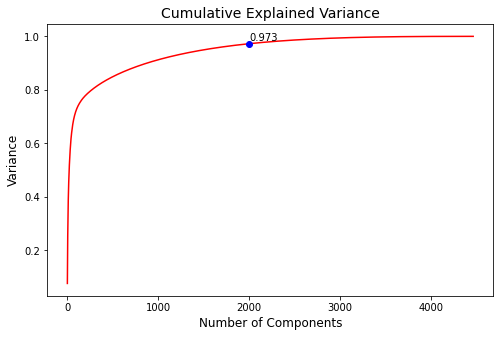

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

pca = PCA().fit(final_set) 
cumulative_explained_variance_ratio_ = np.cumsum(pca.explained_variance_ratio_)                             
plt.plot([i+1 for i in range(len(cumulative_explained_variance_ratio_))],cumulative_explained_variance_ratio_,'red')                          
plt.scatter(2000,cumulative_explained_variance_ratio_[2000-1],color='blue',zorder=3)
plt.text(2000, cumulative_explained_variance_ratio_[2000-1]+0.01, np.round(cumulative_explained_variance_ratio_[2000-1],3),fontsize=10)
plt.title("Cumulative Explained Variance",fontsize=14)                              
plt.xlabel('Number of Components',fontsize=12)                           
plt.ylabel('Variance',fontsize=12)
plt.show()

Από το παραπάνω διάγραμμα παρατηρούμε ότι για αριθμό συνιστωσών, n_components, ίσο με **2000** διατηρείται το **97.3%** της αρχικής διασποράς των χαρακτηριστικών. Το ποσοστό αυτό μας επιτρέπει να χρησιμοποιούμε από εδώ και στο εξής το μετασχηματισμένο, μέσω PCA, final_set το οποίο έχει τώρα διαστάσεις (5000, 2000).

In [ ]:
components = 2000
pca = PCA(n_components=components)
final_set = pca.fit_transform(final_set)                           

In [ ]:
final_set.shape

(5000, 2000)

## Εκπαίδευση χάρτη SOM

Θα δουλέψουμε με τη βιβλιοθήκη SOM ["Somoclu"](http://somoclu.readthedocs.io/en/stable/index.html). Εισάγουμε τις somoclu και matplotlib και λέμε στη matplotlib να τυπώνει εντός του notebook (κι όχι σε pop up window).

In [ ]:
# install somoclu
!pip install --upgrade somoclu
# import sompoclu, matplotlib
import somoclu
import matplotlib
# we will plot inside the notebook and not in separate window
%matplotlib inline

     |████████████████████████████████| 6.2MB 7.2MB/s 
  Created wheel for somoclu: filename=somoclu-1.7.5.1-cp36-cp36m-linux_x86_64.whl size=421014 sha256=7d507a5f2bb0ebdee0cecc9c5e9623aa29375c9e826dceb924b32287df744d7d
  Stored in directory: /root/.cache/pip/wheels/a6/e2/a0/4a61002b47e4965d7f59fd4c7ccf2e86a03ccad366f978d2a7
Successfully built somoclu


Καταρχάς διαβάζουμε το [function reference](http://somoclu.readthedocs.io/en/stable/reference.html) του somoclu. Θα δoυλέψουμε με χάρτη τύπου planar, παραλληλόγραμμου σχήματος νευρώνων με τυχαία αρχικοποίηση (όλα αυτά είναι default). Μπορούμε να δοκιμάσουμε διάφορα μεγέθη χάρτη ωστόσο όσο ο αριθμός των νευρώνων μεγαλώνει, μεγαλώνει και ο χρόνος εκπαίδευσης. Για το training δεν χρειάζεται να ξεπεράσουμε τα 100 epochs. Σε γενικές γραμμές μπορούμε να βασιστούμε στις default παραμέτρους μέχρι να έχουμε τη δυνατότητα να οπτικοποιήσουμε και να αναλύσουμε ποιοτικά τα αποτελέσματα. 

Ξεκινάμε με ένα **χάρτη** **10 x 10**, **100 epochs** training και ένα **υποσύνολο** των ταινιών (π.χ. **2000**). Χρησιμοποιούμε την `time` για να έχουμε μια εικόνα των χρόνων εκπαίδευσης. Ενδεικτικά, με σωστή κωδικοποίηση tf-idf, μικροί χάρτες για λίγα δεδομένα (1000-2000) παίρνουν γύρω στο ένα λεπτό ενώ μεγαλύτεροι χάρτες με όλα τα δεδομένα μπορούν να πάρουν 10-15 λεπτά ή και περισσότερο.


Βρίσκουμε αρχικά το υποσύνολο των ταινιών, **reduced_final_set**, με το οποίο θα δουλέψουμε κατά την διαδικασία βελτιστοποίησης των παραμέτρων. Για τον σκοπό αυτό εκμεταλλευόμαστε την παράμετρο **doc_limit** της συνάρτησης build_final_set η οποία καθορίζει τον αριθμό των ταινιών που αυτή επιστρέφει και την θέτουμε ίση με 2000.  

In [ ]:
reduced_final_set = build_final_set(2000)
print(reduced_final_set.shape)

(2000, 4462)


Ομοίως με πριν μπορούμε να εφαρμόσουμε **PCA** για μείωση της διαστατικότητας.

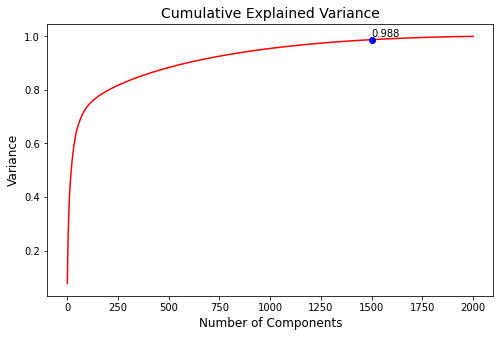

In [ ]:
plt.figure(figsize=(8,5))

pca = PCA().fit(reduced_final_set) 
cumulative_explained_variance_ratio_ = np.cumsum(pca.explained_variance_ratio_)                             
plt.plot([i+1 for i in range(len(cumulative_explained_variance_ratio_))],cumulative_explained_variance_ratio_,'red')                          
plt.scatter(1500,cumulative_explained_variance_ratio_[1500-1],color='blue',zorder=3)
plt.text(1500, cumulative_explained_variance_ratio_[1500-1]+0.01, np.round(cumulative_explained_variance_ratio_[1500-1],3),fontsize=10)
plt.title("Cumulative Explained Variance",fontsize=14)                              
plt.xlabel('Number of Components',fontsize=12)                           
plt.ylabel('Variance',fontsize=12)
plt.show()

Από το παραπάνω διάγραμμα διαπιστώνουμε πως για **1500** συνιστώσες διατηρείται το **98.8%** της αρχικής διασποράς των χαρακτηριστικών.

In [ ]:
components = 1500
pca = PCA(n_components=components)
reduced_final_set = pca.fit_transform(reduced_final_set) 

In [ ]:
reduced_final_set.shape

(2000, 1500)

Στη συνέχεια δοκιμάζουμε διαφορετικά μεγέθη χαρτών και συγκεκριμένα **10 x 10**, **20 x 20**, **25 x 25** και **30 x 30**. Σημειώνουμε πως επειδή η αρχικοποίηση του SOM γίνεται τυχαία και το clustering (το οποίο θα δούμε σε επόμενο βήμα) είναι και αυτό στοχαστική διαδικασία, οι θέσεις και οι ετικέτες των νευρώνων και των clusters θα είναι διαφορετικές κάθε φορά που τρέχουμε τον χάρτη, ακόμα και με τις ίδιες παραμέτρους. Για τον λόγο αυτό επιλέγουμε να σώζουμε ορισμένες μεταβλητές, όπως π.χ. τους εκπαιδευμένους χάρτες, χρησιμοποιώντας πάλι την joblib. 

### **10 x 10**

In [ ]:
n_rows, n_columns = 10, 10
som10 = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
%time som10.train(reduced_final_set, epochs=100)

CPU times: user 2min 6s, sys: 277 ms, total: 2min 6s
Wall time: 1min 4s


In [ ]:
joblib.dump(som10, 'som10.pkl')  

['som10.pkl']

### **20 x 20**

In [ ]:
n_rows, n_columns = 20, 20
som20 = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
%time som20.train(reduced_final_set, epochs=100)

CPU times: user 9min 16s, sys: 1.4 s, total: 9min 17s
Wall time: 4min 46s


In [ ]:
joblib.dump(som20, 'som20.pkl')

['som20.pkl']

### **25 x 25**

In [ ]:
n_rows, n_columns = 25, 25
som25 = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
%time som25.train(reduced_final_set, epochs=100)

CPU times: user 14min 25s, sys: 2.12 s, total: 14min 27s
Wall time: 7min 26s


In [ ]:
joblib.dump(som25, 'som25.pkl')

['som25.pkl']

### **30 x 30**

In [ ]:
n_rows, n_columns = 30, 30
som30 = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
%time som30.train(reduced_final_set, epochs=100)

CPU times: user 21min 4s, sys: 3.4 s, total: 21min 7s
Wall time: 10min 52s


In [ ]:
joblib.dump(som30, 'som30.pkl')

['som30.pkl']


## Best matching units

Μετά από κάθε εκπαίδευση αποθηκεύουμε σε μια μεταβλητή τα best matching units (bmus) για κάθε ταινία. Τα **bmus** μας δείχνουν σε ποιο νευρώνα ανήκει η κάθε ταινία. **Προσοχή**: η σύμβαση των συντεταγμένων των νευρώνων είναι (στήλη, γραμμή) δηλαδή το ανάποδο από την Python. Με χρήση της [np.unique](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.unique.html) (μια πολύ χρήσιμη συνάρτηση στην άσκηση) αποθηκεύουμε τα **μοναδικά best matching units** (**ubmus**) και τους δείκτες τους (**indices**) προς τις ταινίες. Προφανώς, μπορεί να έχουμε λιγότερα μοναδικά bmus από αριθμό νευρώνων γιατί μπορεί σε κάποιους νευρώνες να μην έχουν ανατεθεί ταινίες. Ως αριθμό νευρώνα θα θεωρήσουμε τον αριθμό γραμμής στον πίνακα μοναδικών bmus.


### **10 x 10**

In [ ]:
som10 = joblib.load('som10.pkl')  

In [ ]:
bmus_10 = som10.bmus
print(bmus_10.shape)

(2000, 2)


In [ ]:
ubmus_10, indices_10 = np.unique(bmus_10, return_inverse=True, axis=0)
print(ubmus_10.shape)

(91, 2)


In [ ]:
print(ubmus_10)

[[0 0]
 [0 1]
 [0 2]
 [0 3]
 [0 4]
 [0 6]
 [0 7]
 [0 8]
 [0 9]
 [1 0]
 [1 1]
 [1 2]
 [1 3]
 [1 4]
 [1 5]
 [1 6]
 [1 7]
 [1 8]
 [1 9]
 [2 0]
 [2 1]
 [2 2]
 [2 3]
 [2 4]
 [2 7]
 [2 8]
 [2 9]
 [3 0]
 [3 1]
 [3 2]
 [3 3]
 [3 4]
 [3 5]
 [3 6]
 [3 7]
 [3 8]
 [3 9]
 [4 0]
 [4 1]
 [4 2]
 [4 3]
 [4 4]
 [4 6]
 [4 7]
 [4 9]
 [5 0]
 [5 1]
 [5 2]
 [5 3]
 [5 4]
 [5 5]
 [5 6]
 [5 7]
 [5 8]
 [5 9]
 [6 0]
 [6 1]
 [6 2]
 [6 4]
 [6 6]
 [6 7]
 [6 9]
 [7 0]
 [7 1]
 [7 2]
 [7 3]
 [7 4]
 [7 5]
 [7 6]
 [7 7]
 [7 8]
 [7 9]
 [8 0]
 [8 1]
 [8 2]
 [8 3]
 [8 4]
 [8 5]
 [8 7]
 [8 8]
 [8 9]
 [9 0]
 [9 1]
 [9 2]
 [9 3]
 [9 4]
 [9 5]
 [9 6]
 [9 7]
 [9 8]
 [9 9]]


### **20 x 20**

In [ ]:
som20 = joblib.load('som20.pkl')  

In [ ]:
bmus_20 = som20.bmus
print(bmus_20.shape)

(2000, 2)


In [ ]:
ubmus_20, indices_20 = np.unique(bmus_20, return_inverse=True, axis=0)
print(ubmus_20.shape)

(308, 2)


In [ ]:
print(ubmus_20)

[[ 0  0]
 [ 0  1]
 [ 0  2]
 [ 0  3]
 [ 0  4]
 [ 0  5]
 [ 0  6]
 [ 0  7]
 [ 0  8]
 [ 0  9]
 [ 0 10]
 [ 0 11]
 [ 0 12]
 [ 0 13]
 [ 0 14]
 [ 0 15]
 [ 0 16]
 [ 0 17]
 [ 0 18]
 [ 0 19]
 [ 1  0]
 [ 1  1]
 [ 1  2]
 [ 1  3]
 [ 1  4]
 [ 1  5]
 [ 1  6]
 [ 1  8]
 [ 1  9]
 [ 1 10]
 [ 1 12]
 [ 1 13]
 [ 1 15]
 [ 1 16]
 [ 1 17]
 [ 1 18]
 [ 1 19]
 [ 2  0]
 [ 2  1]
 [ 2  2]
 [ 2  3]
 [ 2  4]
 [ 2  5]
 [ 2  6]
 [ 2  7]
 [ 2  9]
 [ 2 10]
 [ 2 12]
 [ 2 13]
 [ 2 14]
 [ 2 15]
 [ 2 17]
 [ 2 18]
 [ 2 19]
 [ 3  0]
 [ 3  1]
 [ 3  2]
 [ 3  3]
 [ 3  4]
 [ 3  5]
 [ 3  6]
 [ 3  7]
 [ 3  8]
 [ 3 10]
 [ 3 11]
 [ 3 12]
 [ 3 13]
 [ 3 15]
 [ 3 16]
 [ 3 19]
 [ 4  0]
 [ 4  2]
 [ 4  5]
 [ 4  6]
 [ 4  8]
 [ 4 10]
 [ 4 11]
 [ 4 13]
 [ 4 14]
 [ 4 16]
 [ 4 17]
 [ 4 18]
 [ 4 19]
 [ 5  0]
 [ 5  1]
 [ 5  2]
 [ 5  4]
 [ 5  5]
 [ 5  6]
 [ 5  7]
 [ 5  8]
 [ 5  9]
 [ 5 11]
 [ 5 12]
 [ 5 13]
 [ 5 15]
 [ 5 16]
 [ 5 19]
 [ 6  0]
 [ 6  1]
 [ 6  3]
 [ 6  4]
 [ 6  5]
 [ 6  8]
 [ 6  9]
 [ 6 11]
 [ 6 13]
 [ 6 14]
 [ 6 16]
 [ 6 18]
 [ 6 19]
 

### **25 x 25**

In [ ]:
som25 = joblib.load('som25.pkl')  

In [ ]:
bmus_25 = som25.bmus
print(bmus_25.shape)

(2000, 2)


In [ ]:
ubmus_25, indices_25 = np.unique(bmus_25, return_inverse=True, axis=0)
print(ubmus_25.shape)

(425, 2)


In [ ]:
print(ubmus_25)

[[ 0  0]
 [ 0  1]
 [ 0  2]
 [ 0  3]
 [ 0  4]
 [ 0  5]
 [ 0  6]
 [ 0  7]
 [ 0  8]
 [ 0  9]
 [ 0 10]
 [ 0 11]
 [ 0 12]
 [ 0 13]
 [ 0 14]
 [ 0 15]
 [ 0 16]
 [ 0 17]
 [ 0 18]
 [ 0 19]
 [ 0 20]
 [ 0 21]
 [ 0 22]
 [ 0 23]
 [ 0 24]
 [ 1  0]
 [ 1  1]
 [ 1  3]
 [ 1  4]
 [ 1  6]
 [ 1  7]
 [ 1  8]
 [ 1 10]
 [ 1 11]
 [ 1 15]
 [ 1 16]
 [ 1 17]
 [ 1 20]
 [ 1 21]
 [ 1 24]
 [ 2  0]
 [ 2  1]
 [ 2  2]
 [ 2  3]
 [ 2  4]
 [ 2  5]
 [ 2  8]
 [ 2  9]
 [ 2 10]
 [ 2 13]
 [ 2 18]
 [ 2 19]
 [ 2 21]
 [ 2 22]
 [ 2 23]
 [ 3  0]
 [ 3  1]
 [ 3  2]
 [ 3  3]
 [ 3  4]
 [ 3  6]
 [ 3  7]
 [ 3  8]
 [ 3  9]
 [ 3 11]
 [ 3 12]
 [ 3 14]
 [ 3 16]
 [ 3 17]
 [ 3 18]
 [ 3 19]
 [ 3 20]
 [ 3 21]
 [ 3 22]
 [ 3 23]
 [ 3 24]
 [ 4  0]
 [ 4  1]
 [ 4  2]
 [ 4  3]
 [ 4  4]
 [ 4  5]
 [ 4  6]
 [ 4  7]
 [ 4 10]
 [ 4 11]
 [ 4 12]
 [ 4 14]
 [ 4 18]
 [ 4 22]
 [ 4 24]
 [ 5  0]
 [ 5  1]
 [ 5  2]
 [ 5  5]
 [ 5  8]
 [ 5 10]
 [ 5 12]
 [ 5 14]
 [ 5 15]
 [ 5 17]
 [ 5 18]
 [ 5 19]
 [ 5 20]
 [ 5 21]
 [ 5 22]
 [ 5 23]
 [ 5 24]
 [ 6  0]
 [ 6  1]
 [ 6  2]
 

### **30 x 30**

In [ ]:
som30 = joblib.load('som30.pkl') 

In [ ]:
bmus_30 = som30.bmus
print(bmus_30.shape)

(2000, 2)


In [ ]:
ubmus_30, indices_30 = np.unique(bmus_30, return_inverse=True, axis=0)
print(ubmus_30.shape)

(571, 2)


In [ ]:
print(ubmus_30)

[[ 0  0]
 [ 0  1]
 [ 0  2]
 ...
 [29 27]
 [29 28]
 [29 29]]



## Ομαδοποίηση (clustering)

Τυπικά, η ομαδοποίηση σε ένα χάρτη SOM προκύπτει από το unified distance matrix (U-matrix): για κάθε κόμβο υπολογίζεται η μέση απόστασή του από τους γειτονικούς κόμβους. Εάν χρησιμοποιηθεί **μπλε** χρώμα στις περιοχές του χάρτη όπου η τιμή αυτή είναι χαμηλή (**μικρή απόσταση**) και **κόκκινο** εκεί που η τιμή είναι υψηλή (**μεγάλη απόσταση**), τότε μπορούμε να πούμε ότι οι μπλε περιοχές αποτελούν clusters και οι κόκκινες αποτελούν σύνορα μεταξύ clusters.

To somoclu δίνει την επιπρόσθετη δυνατότητα να κάνουμε ομαδοποίηση των νευρώνων χρησιμοποιώντας οποιονδήποτε αλγόριθμο ομαδοποίησης του scikit-learn. Στην άσκηση χρησιμοποιούμε τον **k-Means**. 

## Οπτικοποίηση U-matrix, clustering και μέγεθος clusters

Για την εκτύπωση του U-matrix χρησιμοποιούμε τη **view_umatrix** με ορίσματα bestmatches=True και figsize=(15, 15). Τα διαφορετικά χρώματα που εμφανίζονται στους κόμβους αντιπροσωπεύουν τα διαφορετικά clusters που προκύπτουν από τον k-Means. Για την εμφάνιση της λεζάντας του U-matrix δίνουμε επιπλέον το όρισμα colorbar, ενώ δεν τυπώνουμε τις ετικέτες (labels) των δειγμάτων καθώς είναι πολύ μεγάλος ο αριθμός τους.

Για μια δεύτερη πιο ξεκάθαρη οπτικοποίηση του clustering τυπώνουμε απευθείας τη μεταβλητή clusters.

Τέλος, χρησιμοποιώντας πάλι την np.unique (με διαφορετικό όρισμα) και την np.argsort (υπάρχουν και άλλοι τρόποι υλοποίησης) εκτυπώνουμε τις ετικέτες των clusters (αριθμοί από 0 έως k-1) και τον αριθμό των νευρώνων σε κάθε ένα από αυτά, με **αύξουσα** σειρά ως προς τον αριθμό των νευρώνων. Ουσιαστικά είναι ένα εργαλείο για να βρίσκουμε εύκολα τα μεγάλα και μικρά clusters.

Για τον αρχικό μας χάρτη διαστάσεων **10 x 10**, δοκιμάζουμε τον αλγόριθμο κοντινότερων γειτόνων για **k=20** και τυπώνουμε όλα τα παραπάνω.


**10 x 10** και **k=20**

-------------------------------------------------------------- k = 20  --------------------------------------------------------------

 Som Clusters 
[[18  3  3 19 17 17  6 16 16 16]
 [18  3  3 19 19  6  6  6  0  0]
 [18  3 13 19 19  6  6  6  0  0]
 [10 10 13 13  5  5 12 12  8  8]
 [10 10 13  5  5  5 12 12  4  8]
 [ 2  2  2 11  5  5 12  4  4 15]
 [ 2  2 11 11 11 11 11 15 15 15]
 [ 2  2  7 11 11 11 11  1  1  1]
 [ 2 14  7 11  9 11  1  1  1  1]
 [14 14  7  9  9  9  1  1  1  1]]

 Clusters sorted by increasing number of neurons: 
Cluster index
Number of neurons
[[17 16  4 14  7  8 18  0 15 13  9 10 12  3 19  6  5  2  1 11]
 [ 2  3  3  3  3  3  3  4  4  4  4  4  5  5  5  7  7  8 11 12]]



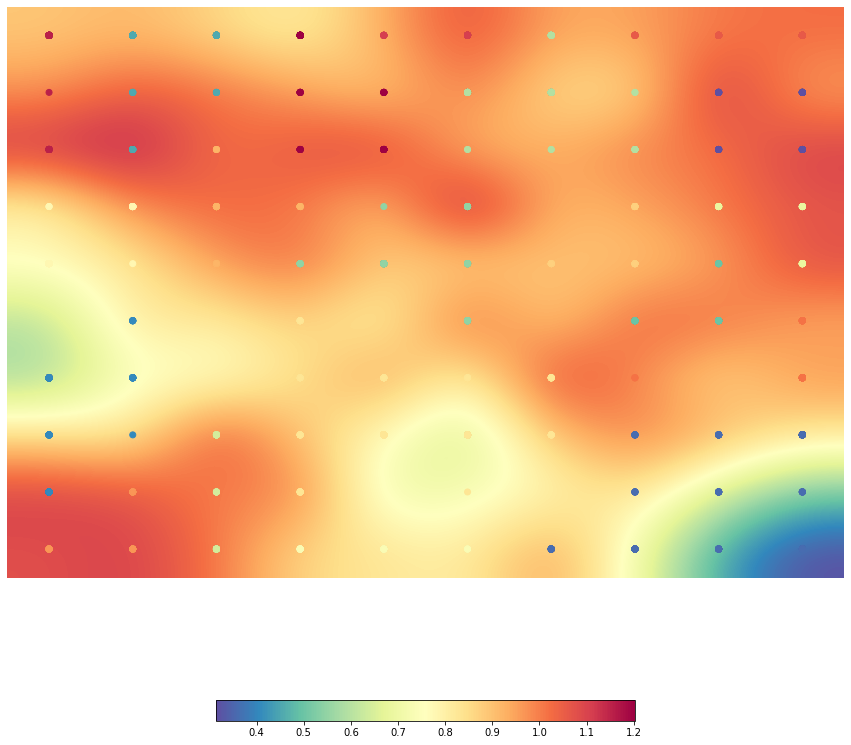

In [ ]:
from sklearn.cluster import KMeans

k = 20
som10.cluster(KMeans(n_clusters=k))
print("--------------------------------------------------------------\033[1m k = {} \033[0m --------------------------------------------------------------".format(k))
print()
print("\033[1m Som Clusters \033[0m")
print(som10.clusters)
print()
unique_values, counts = np.unique(som10.clusters, return_counts=True)
arr = np.asarray((unique_values, counts))
sorted_arr = arr[ :, arr[1].argsort()]
print("\033[1m Clusters sorted by increasing number of neurons: \033[0m")
print("Cluster index")
print("Number of neurons")
print(sorted_arr)
print()
som10.view_umatrix(bestmatches=True, colorbar=True, figsize=(15, 15)); matplotlib.pyplot.show()

Παρατηρούμε τρεις περιοχές, οι οποίες χωρίζονται με μία μεγάλη κόκκινη περιόχη. Στην περιοχή αυτή βρίσκονται σημεία που απέχουν μεγάλη απόσταση μεταξύ τους. 


## Σημασιολογική ερμηνεία των clusters

Προκειμένου να μελετήσουμε τις τοπολογικές ιδιότητες του SOM και το αν έχουν ενσωματώσει σημασιολογική πληροφορία για τις ταινίες διαμέσου της διανυσματικής αναπαράστασης με το tf-idf και των κατηγοριών, χρειαζόμαστε ένα κριτήριο ποιοτικής επισκόπησης των clusters. Θα υλοποιήσουμε το εξής κριτήριο: Λαμβάνουμε όρισμα έναν αριθμό (ετικέτα) cluster. Για το cluster αυτό βρίσκουμε όλους τους νευρώνες που του έχουν ανατεθεί από τον k-Means. Για όλους τους νευρώνες αυτούς βρίσκουμε όλες τις ταινίες που τους έχουν ανατεθεί (για τις οποίες αποτελούν bmus). Για όλες αυτές τις ταινίες τυπώνουμε ταξινομημένη τη συνολική στατιστική όλων των ειδών (κατηγοριών) και τις συχνότητές τους. Αν το cluster διαθέτει καλή συνοχή και εξειδίκευση, θα πρέπει κάποιες κατηγορίες να έχουν σαφώς μεγαλύτερη συχνότητα από τις υπόλοιπες. Θα μπορούμε τότε να αναθέσουμε αυτήν/ές την/τις κατηγορία/ες ως ετικέτες κινηματογραφικού είδους στο cluster.

Για τον σκοπό αυτό πραγματοποιούμε την ακόλουθη διαδικασία:

1. Ορίζουμε συνάρτηση `print_categories_stats` που δέχεται ως είσοδο λίστα με ids ταινιών. Δημιουργούμε μια κενή λίστα συνολικών κατηγοριών. Στη συνέχεια, για κάθε ταινία επεξεργαζόμαστε το string `categories` ως εξής: δημιουργούμε μια λίστα διαχωρίζοντας το string κατάλληλα με την `split` και αφαιρούμε τα whitespaces μεταξύ ετικετών με την `strip`. Προσθέτουμε τη λίστα αυτή στη συνολική λίστα κατηγοριών με την `extend`. Τέλος χρησιμοποιούμε πάλι την `np.unique` για να μετρήσουμε συχνότητα μοναδικών ετικετών κατηγοριών και ταξινομούμε με την `np.argsort`. Τυπώνουμε τις κατηγορίες και τις συχνότητες εμφάνισης ταξινομημένα. 

   

In [ ]:
def print_categories_stats(IDs):
    total_categories = []                                                                        # Αρχικοποιούμε τη συνολική λίστα κατηγοριών
    for movie_id in IDs:                                                                         # Για κάθε movie_id στην λίστα IDs
        movie_categories = categories[movie_id][0].split(",")  # list                            # Δημιουργούμε μία λίστα με τις κατηγορίες της
        for i in range(len(movie_categories)):                                                   # Σε κάθε μία από αυτές αφαιρούμε το whitespace  
            total_categories.extend([movie_categories[i].strip()])                               # και την κάνουμε extend στην συνολική λίστα κατηγοριών
    unique_categories, counts = np.unique(total_categories, return_counts=True)                  # Βρίσκουμε τις μοναδικές κατηγορίες και την συχνότητά τους
    largest_categories_indexes = np.argsort(counts)[::-1]                                        # Ταξινομούμε τις κατηγορίες σε φθίνουσα σειρά συχνοτήτων
    result = [(unique_categories[index],counts[index]) for index in largest_categories_indexes]  # Δημιουργούμε την τελική ταξινομημένη λίστα από tuples της μορφής (Category,Counts)
    print("Overall Cluster Genres stats:")                                                       # Τυπώνουμε τις κατηγορίες και τις συχνότητες εμφάνισης ταξινομημένα
    print(result)
    return result                                                                                # Επιστρέφουμε την τελική λίστα με τις στατιστικές των κατηγοριών των ταινιών

2. Ορίζουμε τη βασική μας συνάρτηση `print_cluster_neurons_movies_report` που δέχεται ως όρισμα ένα som, τα ubmus που του αντιστοιχούν και τον αριθμό ενός cluster. Με χρήση της `np.where` βρίσκουμε τις συντεταγμένες των bmus που αντιστοιχούν στο cluster και με την `column_stack` φτιάχνουμε έναν πίνακα bmus για το cluster. **Προσοχή** στη σειρά (στήλη - γραμμή) στον πίνακα bmus. Για κάθε bmu αυτού του πίνακα ελέγχουμε αν υπάρχει στον πίνακα μοναδικών bmus που έχουμε υπολογίσει στην αρχή συνολικά και αν ναι προσθέτουμε το αντίστοιχο index του νευρώνα σε μια λίστα. 



In [ ]:
def print_cluster_neurons_movies_report(som,ubmus,cluster_number):
    row_indexes, column_indexes = np.where(som.clusters==cluster_number)        # Βρίσκουμε τις συντεταγμένες όλων των νευρώνων που ανήκουν στο cluster
    cluster_bmus = np.column_stack((column_indexes,row_indexes))                # Φτιάχνουμε έναν πίνακα bmus για το cluster. Προσοχή στη σειρά (στήλη-γραμμή) (ανάποδα από ότι στην python) στον πίνακα bmus 
    cluster_bmus_indices  = []                                                  # Αρχικοποιούμε μία λίστα με τους αριθμούς των νευρώνων
    for cluster_bmu in cluster_bmus:                                            # Για κάθε bmu 
        if (ubmus == cluster_bmu).all(axis=1).any():                            # ελέγχω αν υπάρχει στον πίνακα μοναδικών bmus (ubmus)
            bmus_number = np.where(np.all(cluster_bmu==ubmus,axis=1))[0][0]     # και αν υπάρχει βρίσκω την αντίστοιχη γραμμή
            cluster_bmus_indices.append(bmus_number)                            # και την κάνω append στην λίστα 
    return cluster_bmus                                                         # Επιστρέφω τον πίνακα  bmus για το cluster

3. Υλοποιούμε μια βοηθητική συνάρτηση `neuron_movies_report`. Λαμβάνει ένα som και το σύνολο νευρώνων από την `print_cluster_neurons_movies_report` που του αντιστοιχούν και φτιάχνει μια λίστα με το σύνολο ταινιών που ανήκουν σε αυτούς. Αν ένας νευρώνας ανήκει στον πίνακα `som.bmus`, τότε τα ID's των ταινιών για τα οποία αυτός αναδείχθηκε νικητής συμπίπτουν με τις γραμμές του πίνακα στις οποίες εμφανίζεται ο νευρώνας αυτός. Αυτό εξηγείται καθώς ο πίνακας `som.bmus` περιέχει σε κάθε γραμμή του τον νευρώνα νικητή στον οποίο ανήκει κάθε δείγμα εισόδου (εν προκειμένω ταινία).



In [ ]:
import itertools

def neuron_movies_report(som,neurons):
    cluster_movies_ids = []                                                          # Αρχικοποιώ μία λίστα με τα IDs των ταινιών που ανήκουν στο σύνολο των νευρώνων
    for neuron in neurons:                                                           # Για κάθε νευρώνα
        if (som.bmus == neuron).all(axis=1).any():                                   # ελέγχω αν υπάρχει στον πίνακα των bmus του som
            cluster_movies_ids.append(np.where(np.all(som.bmus==neuron,axis=1))[0])  # και αν υπάρχει βρίσκω τις αντίστοιχες γραμμές οι οποίες συμπίπτουν με τα IDs των ταινιών 
    return list(itertools.chain.from_iterable(cluster_movies_ids))                   # Επιστρέφω την λίστα με τα IDs των ταινιών

Συνεπώς, για να τυπώνουμε ταξινομημένη τη συνολική στατιστική όλων των ειδών (κατηγοριών) των ταινιών ενός συγκεκριμένου cluster και τις συχνότητές τους πραγματοποιούμε διαδοχικά τις εξής κλήσεις συναρτήσεων:

`
cluster_coordinates = print_cluster_neurons_movies_report(som,ubmus,cluster)
`
<br>
`
cluster_movies_ids = neuron_movies_report(som,cluster_coordinates)
`
<br>
`
cluster_category_stats = print_categories_stats(cluster_movies_ids)
`

Ορίζουμε την συνάρτηση `som_clustering` η οποία δέχεται για ορίσματα ένα από τα τρία διαφορετικά soms που μελετάμε εδώ (som20, som25 και som30), τα αντίστοιχα unique best matching units (ubmus_20, ubmus_25 και ubmus_30) καθώς και την τιμή της παραμέτρου k του αλγορίθμου KMeans. Τυπώνει τον U-matrix, τη μεταβλητή clusters (για μία πιο ξεκάθαρη απεικόνιση του clustering), τις ετικέτες των συστάδων (αριθμοί από 0 έως k-1) και τον αριθμό των νευρώνων σε κάθε μία, με αύξουσα σειρά ως προς τον αριθμό τους. Επιπλέον, για όλα τα clusters τυπώνει τις στατιστικές των κατηγοριών των ταινιών που ανήκουν σε αυτά μέσω των τριών βοηθητικών συναρτήσεων που ορίσαμε προηγουμένως.

In [ ]:
np.set_printoptions(linewidth=np.inf)                                           # Για να εμφανίζεται μία γραμμή του πίνακα στην ίδια σειρά και να μην πηγαίνει από κάτω 

def som_clustering(som,ubmus,k):
    som.cluster(KMeans(n_clusters=k))                                           # Εφαρμόζουμε τον αλγόριθμο συσταδοποίησης KMeans με k γείτονες
    print("--------------------------------------------------------------\033[1m k = {} \033[0m --------------------------------------------------------------".format(k))
    print()
    print("\033[1m Som Clusters \033[0m")
    print(som.clusters)                                                         # Τυπώνουμε απευθείας τη μεταβλητή clusters για μία πιο ξεκάθαρη απεικόνιση του clustering
    print()
    unique_values, counts = np.unique(som.clusters, return_counts=True)         # Βρίσκουμε τις μοναδικές συστάδες και τις συχνότητές τους
    arr = np.asarray((unique_values, counts))                                   # Φτιάχνουμε έναν πίνακα με τον αριθμό των συστάδων στην πρώτη γραμμή και τις ανίστοιχες συχνότητές τους στην δεύτερη
    sorted_arr = arr[ :, arr[1].argsort()]                                      # Ταξινομούμε τον πίνακα σε αύξουσα σειρά συχνοτήτων (αριθμού νευρώνων)
    print("\033[1m Clusters sorted by increasing number of neurons:\033[0m")
    print("Cluster index")
    print("Number of neurons")
    print(sorted_arr)                                                           # Τυπώνουμε τον ταξινομημένο πίνακα
    print()
    for i in range(k):                                                          # Για κάθε cluster από τα k που σχηματίζει ο αλγόριθμος τυπώνουμε την στατιστική των κατηγοριών των ταινιών που ανήκουν σε αυτό
        print("---------------------------------------------------------------------------------\033[1m Cluster {} \033[0m---------------------------------------------------------------------------------".format(i))
        print()
        cluster_coordinates = print_cluster_neurons_movies_report(som,ubmus,i)
        cluster_movies_ids = neuron_movies_report(som,cluster_coordinates)
        _ = print_categories_stats(cluster_movies_ids)
        print()
    som.view_umatrix(bestmatches=True, colorbar=True, figsize=(15, 15)); matplotlib.pyplot.show()  # Τυπώνουμε τον U-Matrix

Τυπώνουμε πρώτα την στατιστική των κατηγοριών **όλων** των ταινιών του dataset μας. Καλούμε λοιπόν την συνάρτηση `print_categories_stats` με όρισμα την λίστα με όλα τα IDs από 0 μέχρι και 4999.

In [ ]:
categories_stats = print_categories_stats([i for i in range(5000)])
most_frequent_categories = categories_stats[0:5]
least_frequent_categories = categories_stats[-5:]
print()
print("--------------------------------------------------------------------------------- \033[1m 5 most frequent categories \033[0m ---------------------------------------------------------------------------------")
for cat in most_frequent_categories:
    print("\033[1mCategory:\033[0m {} \033[1mCounts: \033[0m{}".format(cat[0],cat[1]))
print("--------------------------------------------------------------------------------- \033[1m 5 least frequent categories \033[0m ---------------------------------------------------------------------------------")
for cat in least_frequent_categories:
    print("\033[1mCategory:\033[0m {} \033[1mCounts: \033[0m{}".format(cat[0],cat[1]))
print("---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")

Overall Cluster Genres stats:
[('"Drama"', 2324), ('"Comedy"', 1246), ('"Romance Film"', 772), ('"Thriller"', 753), ('"Action"', 681), ('"World cinema"', 592), ('"Crime Fiction"', 494), ('"Horror"', 482), ('"Black-and-white"', 461), ('"Indie"', 439), ('"Action/Adventure"', 431), ('"Family Film"', 391), ('"Short Film"', 384), ('"Adventure"', 355), ('"Musical"', 301), ('"Animation"', 289), ('"Science Fiction"', 288), ('"Romantic drama"', 280), ('"Comedy film"', 238), ('"Fantasy"', 231), ('"Mystery"', 229), ('"Romantic comedy"', 225), ('"War film"', 185), ('"Crime Thriller"', 171), ('"Comedy-drama"', 163), ('"Period piece"', 155), ('"Silent film"', 151), ('"Documentary"', 148), ('"Japanese Movies"', 133), ('"Film adaptation"', 129), ('"Bollywood"', 129), ('"Western"', 124), ('"Psychological thriller"', 123), ('"Chinese Movies"', 112), ('"Black comedy"', 111), ('"Family Drama"', 100), ('"Television movie"', 95), ('"Teen"', 91), ('"Parody"', 91), ('"Children\'s/Family"', 87), ('"Slasher"', 

Παρατηρούμε πως για το dataset μας οι πέντε μεγαλύτερες κατηγορίες ταινιών είναι οι εξής: "Drama", "Comedy", "Romance Film", "Thriller" και "Action". Αντίστοιχα, οι πέντε πιο σπάνιες είναι: "Crime", "Cyberpunk", "Baseball", "Master Criminal Films" και "Gulf War".

## Βελτιστοποίηση παραμέτρων

Για τους χάρτες διαστάσεων **20 x 20**, **25 x 25** και **30 x 30** που είχαμε εκπαιδεύσει και αποθηκεύσει στην αρχή, δοκιμάζουμε τον αλγόριθμο κοντινότερων γειτόνων για διαφορετικές τιμές του k (**k = 15**, **k = 20**, **k = 25** και **k = 30**).

### **20 x 20**

#### k = 15

-------------------------------------------------------------- k = 15  --------------------------------------------------------------

 Som Clusters 
[[ 4  4  4  4  4  4  4  4  4 12 12 12 12  2  2  5  5  5  9  9]
 [ 4  4  4  4  4  4  4  4 12 12 12 12  2  2  2  2  5  5  9  9]
 [ 4  4  4  4  4  4  4  4  4 12 12 12  2  2  2  2  2  2  9  9]
 [ 4  4  4  4  4  4  7  7  7 12 12 12  2  2  2  2  7  7  7 14]
 [ 0  0  0  0  0  0  6  7  2  2  2  2  2  2  2  2  7  7  7  7]
 [ 0  0  0  0  0  6  6  6  6  6  2  2  2  2  2  2  7  7  7 11]
 [ 0  0  0  0  0  6  6  6  6  6  2  2  2  2  2  2 11 11 11 11]
 [ 0  0  0  0  6  6  6  6  6  6  6  2  2  8  2  2 11 11 11 11]
 [ 3  3  3  6  6  6  6  6  6  6  8  8  8  8  8  2 11 11 11 11]
 [ 3  3  3  3  6  6  6  6  6  6  8  8  8  8  8  8  5  5  1  1]
 [ 3  3  3  3  3  3  6 10 10 10  8  8  8  8 14  5  5  5  5  1]
 [ 3  3  3  3  3  3  3 10 10 10 10  8 10 14 14  5  5  5  5  5]
 [ 3  3  3  3  3  3 10 10 10 10 10 10 10 10 14 14  5  5  5  5]
 [13  3  3  3  3 10 10 10 10 10

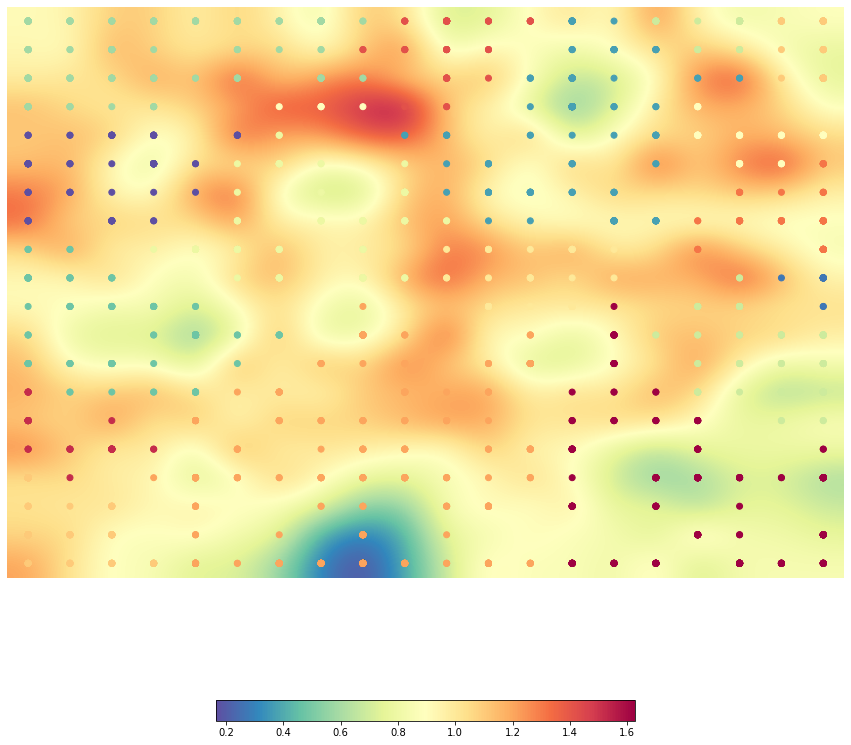

In [ ]:
som_clustering(som20,ubmus_20,15)

#### k = 20

-------------------------------------------------------------- k = 20  --------------------------------------------------------------

 Som Clusters 
[[10 10 10  0  0  0  0  0  0  6  6  6  6  6  6  8  8  8  9  9]
 [10 10 10 10  0  0  0  0  0  6  6  6  6  6  6  6  8  8  9  9]
 [10 10 10 10  0  0  0  0  0  6  6  6  6  6  6  6  6  6  9  9]
 [10 10 18 18 18  0  0  0  0  6  6  6  6  6  6  6  4  4 17  5]
 [12 18 18 18 18 18  7  0  6 14  6  6  6  6  6  4  4  4  4 17]
 [12 12 18 18 18  7  7  7  7  7 13 13 13  6 13  4  4  4  4 19]
 [12 12 12 18 18  7  7  7  7  7  7 13 13 13 13 13 19 19 19 19]
 [12 12  3  3  3  7  7  7  7  7  7 13 13 13 13 13 19 19 19 19]
 [16 16  3  3  3  3  7  7  7  7  7 13 13 13 13 13 19 19 19 19]
 [16 16 16  3  3  3  7  7  7  7  7  1  1  1  1  1  8  8  5  5]
 [16 16 16  3  3  3  3 11 11 11  1  1  1  1  1  8  8  8  8  8]
 [16 16 16  3  3  3  3 11 11 11 11  1  1  1  1  1  8  8  8  8]
 [16 16 16 16  3  3 11 11 11 11 11  1  1  1  1  5  8  8  8  8]
 [16 16 16  3  3  3  2  2 11 11

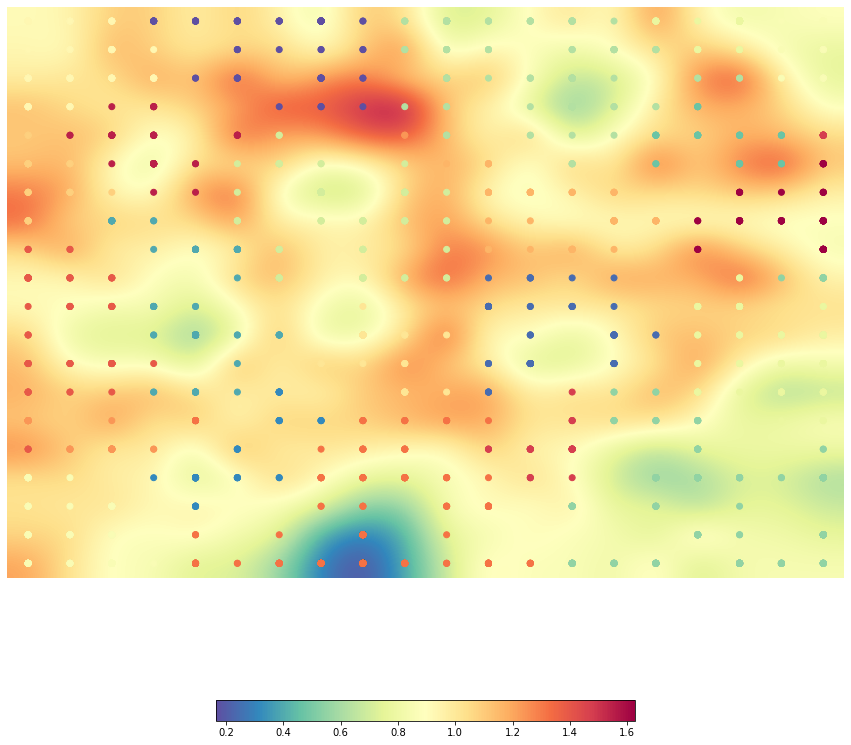

In [ ]:
som_clustering(som20,ubmus_20,20)

#### k = 25

-------------------------------------------------------------- k = 25  --------------------------------------------------------------

 Som Clusters 
[[ 6  6  6  6 15 15 15 15 15 16 16 16 21 21 21 21 13 13 13 13]
 [ 6  6  6  6 15 15 15 15 16 16 16 16 21 21 21 21 13 13 13 13]
 [17 17 17 17 15 15 15 15 15 16 16 16 21 21 21 21 21 13 13 13]
 [17 17 17 23 23 15 15 15 15 16 16 16 21 21 21 21  4  4  4  1]
 [ 2 17 23 23 23 23 18 15 21 21 21 14 21 21 21  4  4  4  4  4]
 [ 2  2 23 23 23 18 18 18 18 18 14 14 14 14 14  4  4  4  4  4]
 [ 2  2 23 23 23 18 18 18 18 18 18 14 14 14 14 14  9  9  9  9]
 [ 2  2 23  8  8  5 18 18 18 18 18 14 14 14 14 14  9  9  9  9]
 [ 7  7  8  8  8  5  5 18 11 18 10 10 10  0  0 14  9  9  9  9]
 [ 7  7  7  8  8  5  5 11 11 11 10 10 10  0  0  0 12 12  1  1]
 [ 7  7  7  8  8  8  5 11 11 11 10 10 19 19 19 12 12 12 12 12]
 [ 7  7  7  8  8  8  8 11 11 11 19 19 19 19 19 12 12 12 12 12]
 [ 7  7  7  7  8  8 24 24 11 11  3 19 19 19 19  1 12 12 12 12]
 [ 7  7  7  8  8  8 24 24  3  3

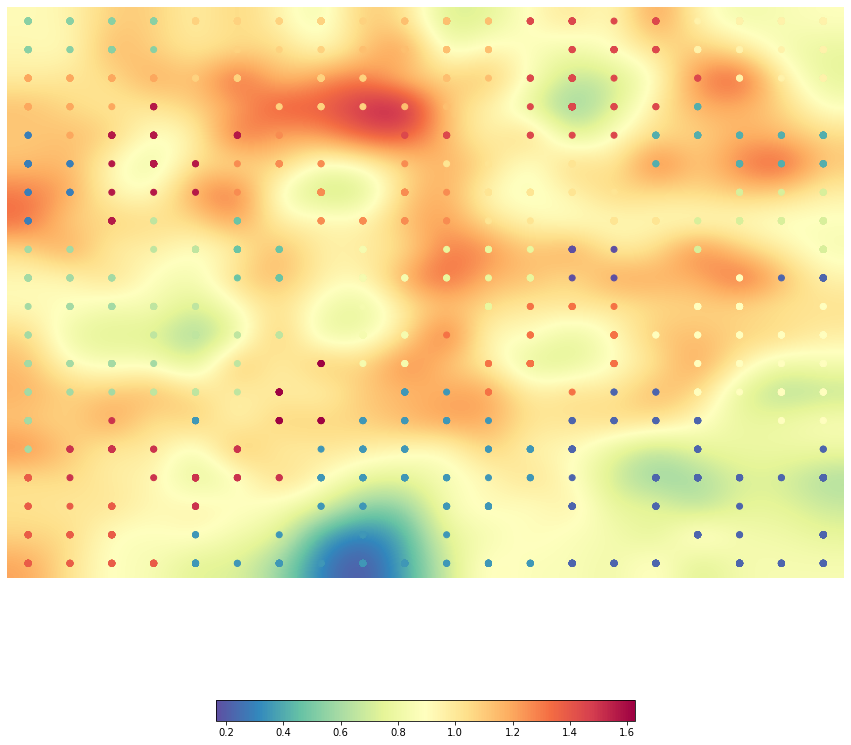

In [ ]:
som_clustering(som20,ubmus_20,25)

#### k = 30

-------------------------------------------------------------- k = 30  --------------------------------------------------------------

 Som Clusters 
[[14 14 14 11 11 11 11 11 11  9  9  9  3  3  3  3  8  8  8  8]
 [14 14 14  2 11 11 11 11 11  9  9  9  3  3  3  3  8  8  8  8]
 [14 14 14  2  2 11 11 29 29  9  9  9  3  3  3  3  8  8  8  8]
 [14 14 14  2  2 11 29 29 29  3  3  3  3  3  3  3 10 10 28 28]
 [21 21 21 21 21 21 18 29  3  3  3  3  3  3  3  3 10 10 10 28]
 [21 21 21 21 21 18 18 18 18 18 23 23 23  3 23  3 10 10 10 19]
 [21 21 21 21 21 18 18 18 18 18 18 23 23 23 23  0 19 19 19 19]
 [24 21  5  5  5  9 18 18 18 18 18 23 23 23 23  0  0 19 19 19]
 [24 24  5  5  5  9  9 18 18 18 13 23 27 27 27  0  0 19 19 19]
 [24 24 24  5  5  9  9 16 16 16 13 13 13 27 27 27 26 26 28 28]
 [24 24 24  5  5  5 16 16 16 16 13 13 13  4  4 26 26 26  6  6]
 [ 7  7  7  5  5  5 16 16 16 16 13 13  4  4  4  4 26 26  6  6]
 [ 7  7  7  7  5  5 25 16 16 16 15  4  4  4  4  4 26  6  6  6]
 [ 7  7  7  5  5  5 25 25 15 15

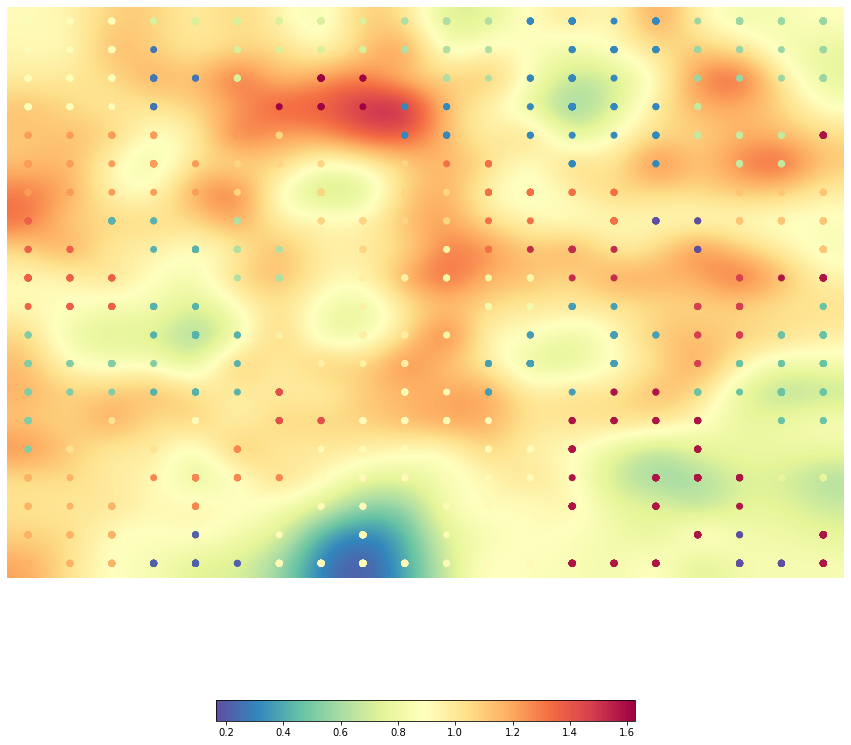

In [ ]:
som_clustering(som20,ubmus_20,30)

### **25 x 25**

#### k = 15

-------------------------------------------------------------- k = 15  --------------------------------------------------------------

 Som Clusters 
[[ 2  2  6  6  6  2  2  2  6  4  4  4  4  4  5  5  5  5 11 14 14 14 14 14 14]
 [ 6  6  6  6  6  2  2  2  2  4  4  4  4  5  5  5  5  5  5 14 14 14 14 14 14]
 [ 6  6  6  6  6  2  2  2  2  4  4  4  4  5  5  5  5  5  5  5 14 14 14 14 14]
 [ 6  6  6  6  6  2  2  2  2  4  4  4  4  5  5  5  5  5  5  5  5  5 14 14 14]
 [ 6  6  6  6  6  2  2  2  2  4  4  4  5  5  5  5  5  5  5  5  5  5  5  0  0]
 [ 6  6  6  6  2  2  2  2  2  2 11  5  5  5  5  5  5  5  5  5  5  5  0  0  0]
 [ 9  9  9  9  9  2  2  2  2  2 11 11 11  5  5  5  5  5  5  5  0  0  0  0  0]
 [ 9  9  9  9  9  2  2  2  2 11 11 11 11 11  5  5  5  5  5  5  0  0  0  0  0]
 [ 9  9  9  9  9  2  2  2 11 11 11 11 11 11  5  5  5  5 10  0  0  0  0  0  0]
 [ 9  8  9  9  9  2  1 11  7  7 11 11 11 11 11  5 10 10 10  0  0  0  0  0  0]
 [ 8  8  8  8  8  1  1  7  7  7  7 11 11 11 11 10 10 10 10  0  0  0  0

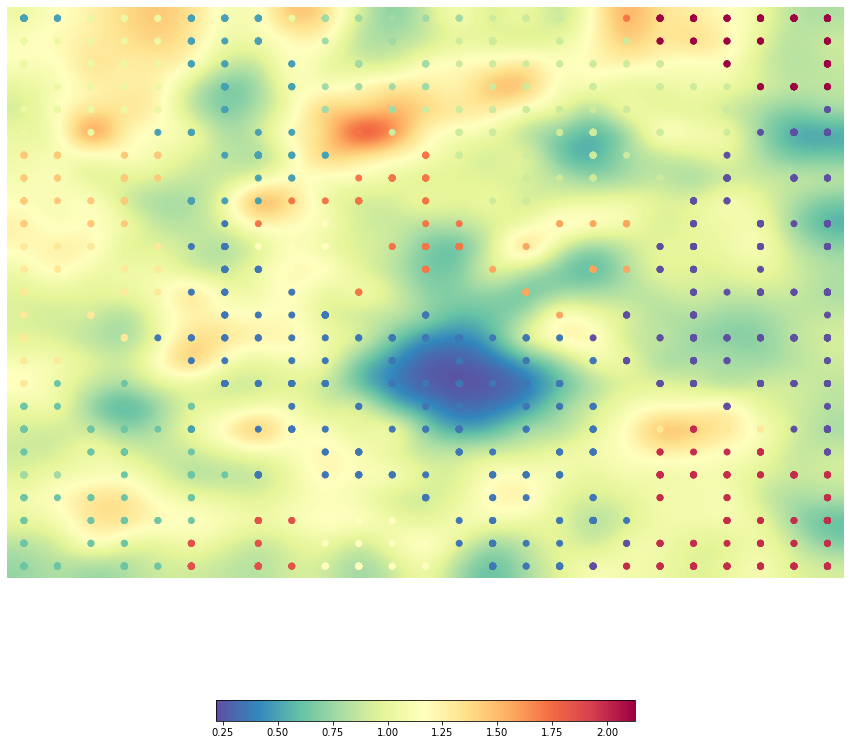

In [ ]:
som_clustering(som25,ubmus_25,15)

#### k = 20

-------------------------------------------------------------- k = 20  --------------------------------------------------------------

 Som Clusters 
[[ 3  3  3  3  3 12 12 12 12 10 10 10 10 10 19 19 19 19  9  9  9  9  9  9  9]
 [ 3  3  3  3  3 12 12 12 12 10 10 10 10 19 19 19 19 19  9  9  9  9  9  9 16]
 [ 3  3  3  3  3  5  5  5  5 10 10 10 10 19 19 19 19 19  1  9  9  9  9  4  4]
 [17 17  3  3  3  5  5  5  5 10 10 10 10  1  1  1  1  1  1  9  9  1  9  4  4]
 [17 17 17 17 17  5  5  5  5  5  1  1  1  1  1  1  1  1  1  1  1  1  1  4  4]
 [17 17 17 17  5  5  5 15 15  5  0  1  1  1  1  1  1  1  1  1  1  1  4  4  4]
 [17 17 17  5  5  5 15 15 15 12  0  0  0  1  1  1  1  1  1  1 12 12  4  4  4]
 [17 17 15 15 15 15 15 15 15  0  0  0  0  0  1  1  1  1  1 12 12 12  4  4  4]
 [17 17 15 15 15 15 15 15  0  0  0  0  0  0  1  1  1  1 16 12 12 12  4  4  4]
 [ 6  6 15 15 15 15  2  0  0  0  0  0  0  0  0  1 16 16 16 16 12  4  4  4  4]
 [ 6  6  6  7  7  2  2  2  0  0  0  0  0  0  0  1 16 16 16  4  4  4  4

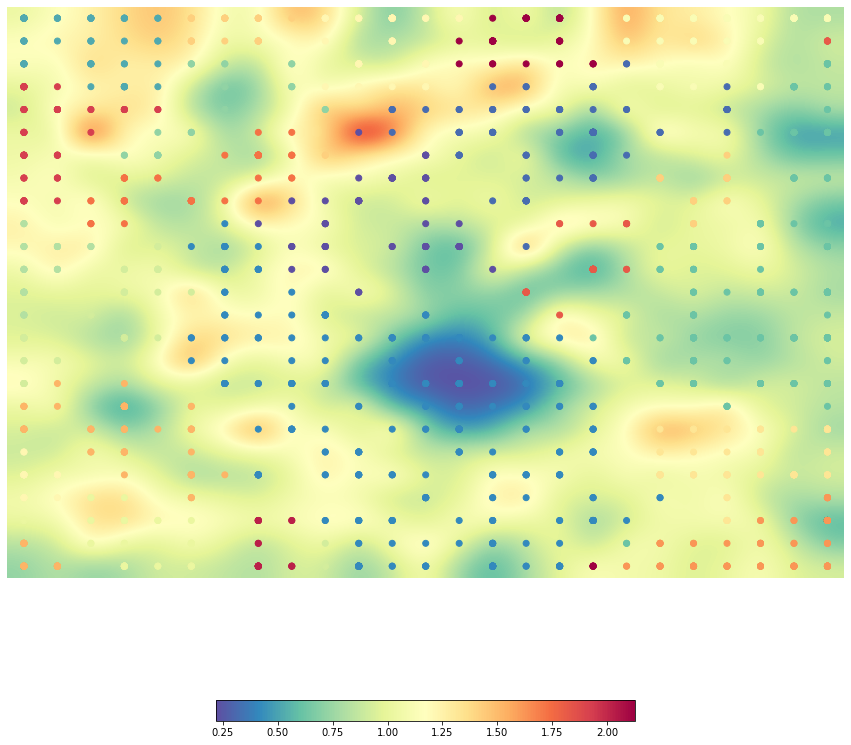

In [ ]:
som_clustering(som25,ubmus_25,20)

#### k = 25

-------------------------------------------------------------- k = 25  --------------------------------------------------------------

 Som Clusters 
[[11 11 11 11 11 19 19 19 19 13 13 13 13 13 24 24 24 24 12 12 12 12 14 14 14]
 [11 11 11 11 11 19 19 19 19 13 13 13 13 24 24 24 24 24  2 12 12 12 14 14 14]
 [11 11 11 11 11 21 21 21 21 13 13 13  7 24 24 24 24 24  2  2  2 14 14 14 14]
 [ 4  4 11 11 11 21 21 21 21 21 13 13  7  7  7  7  7  7  7  2  2 14 14 14 14]
 [ 4  4  4  4  4 21 21 21 21 21  7  7  7  7  7  7  7  7  7  7 15 15 15 15 15]
 [ 4  4  4  4 21 21 21 22 22 21 10  7  7  7  7  7  7  7  7  7  7 15 15 15 15]
 [ 4  4  4  4 21 21 22 22 22 19 10 10 10  7  7  7  7  7  7  7 19 19 15 15 15]
 [ 4  4  4  4 22 22 22 22 22 10 10 10 10 10  7  7  7  7  7 19 19 19 15 15 15]
 [ 4  4 22 22 22 22 22 22 10 10 10 10 10 10  7  7  7  7  2 19 19 19  3 15  3]
 [20 20 20 22 22 22  6  6 10 10 10 10 10 10  7  7  3  3  2  2 19  3  3  3  3]
 [20 20 20  6  6  6  6  6 10 10 10 10 10 10 10  7  3  3  3  2  2  3  3

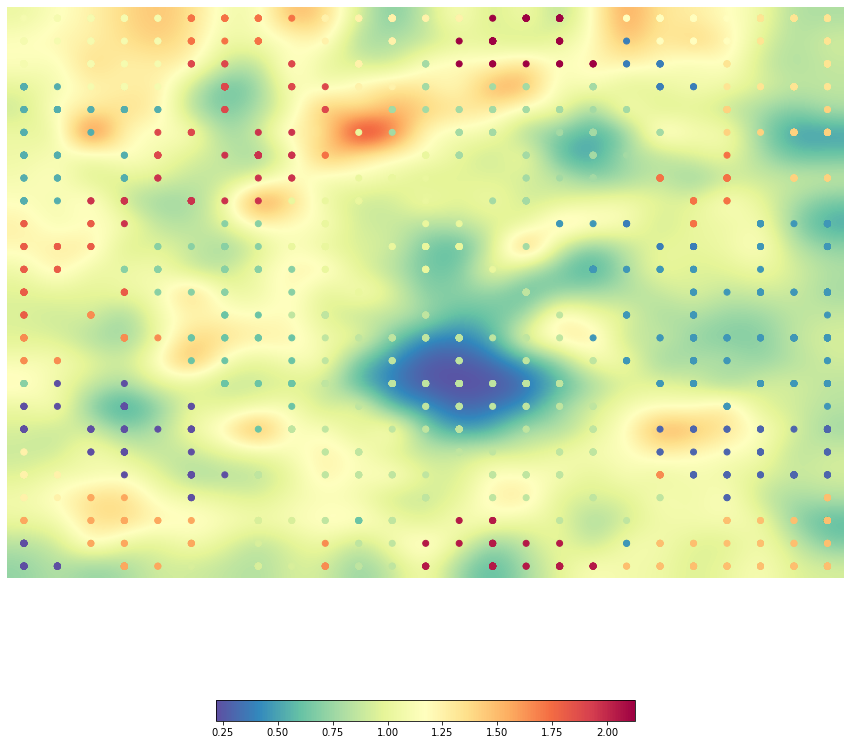

In [ ]:
som_clustering(som25,ubmus_25,25)

#### k = 30

-------------------------------------------------------------- k = 30  --------------------------------------------------------------

 Som Clusters 
[[25 25 11 10 10 10 10 10 10  1  1  1  1  1 12 12 12 12 18 18 18 18  2  2  2]
 [11 11 11 11 10 10 10 10 10  1  1  1  1 12 12 12 12 12 18 18 18  2  2  2  2]
 [11 11 11 11 11 16 16 16 16  1  1  1  1 12 12 12 12 12 29 29 29  2  2  2  2]
 [11 11 11 11 11 16 16 16 16  1  1  1  1 29 29 29 29 29 29 29 29  2  2  2  2]
 [11 11 11  3  3 16 16 16 16 16 29 29 29  8  8 29 29 29 29 29 29 29  2  2  2]
 [11 11  3  3 16 16 16 25 25 10  8  8  8  8  8 29 29 29 29 29 29 29  2  2  2]
 [ 3  3  3 16 16 16 25 25 25 10 24 24  8  8  8 29 29 29 29 29 18 18  2  2  2]
 [ 3  3  3  3 25 25 25 25 25 27 24 24 24  8 29 29 29 29 29 18 18 18  4  2  2]
 [ 3  3 25 25 25 25 25 25 27 27 24 24 24 27 29 29 29 29 19 18 18 18  4  4  4]
 [20 20 20 25 25 25 17 17 27 27 27 27 27 27 27 29 19 19 19 18 18  4  4  4  4]
 [20 20 20 20  9 17 17 17 27 27 27 27 27 27 27 19 19 19 19  4  4  4  4

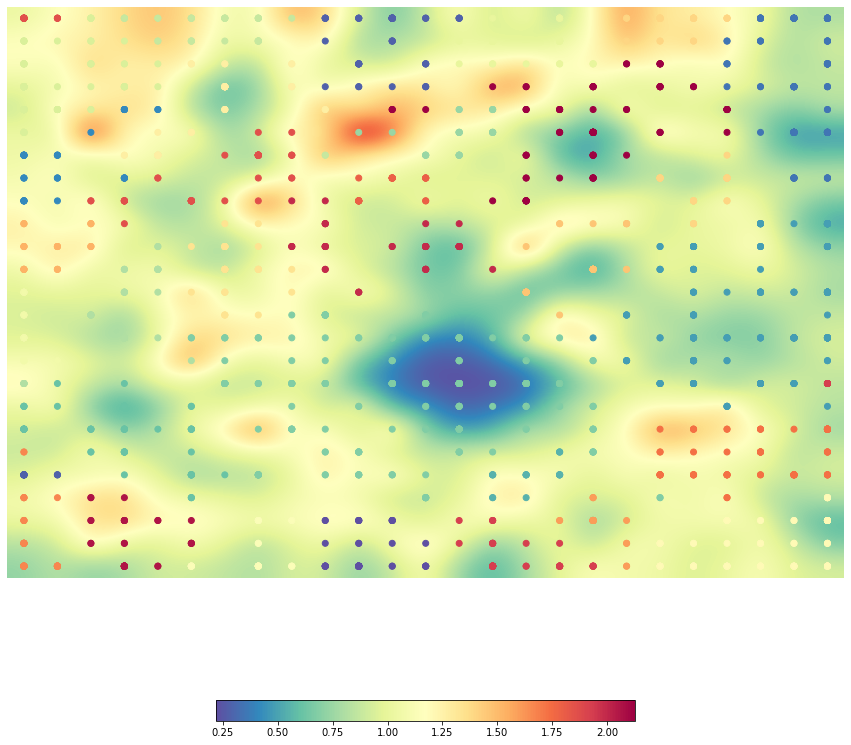

In [ ]:
som_clustering(som25,ubmus_25,30)

### **30 x 30**

#### k = 15

-------------------------------------------------------------- k = 15  --------------------------------------------------------------

 Som Clusters 
[[ 7  7  7  5  5 14 14  8  8  8  8  8  8  7  7  7  7  7  7  7  7 13 13 13 13 13 13 13 13 13]
 [ 7  7  7  5 14 14 14  8  8  8  8  8  8  7  7  7  7  7  7  7  7 13 13 13 13 13 13 13 13 13]
 [ 0  0  0 14 14 14  8  8  8  8  8  8  8  8  7  7  7  7  7  7  7 13 13 13 13 13 13 13 11 11]
 [ 0  0  0  0 14  8  8  8  8  8  8  8  8  8  7  7  7  7  7  7  1  1 13 13 13 13 13 13 11 11]
 [ 0  0  0  0  0  8  8  8  8  8  8  8  8  8  7  7  7  7  7  1  1  1 13 13 13 13 13 13  1  1]
 [ 0  0  0  0  0 14  8  8  8  8  8  8  8  8  7  7  7  7  3  1  1  1 13 13 13  1  1  1  1  1]
 [ 6  0  0  0  6  6 12  8  8  8  8  8  8  1  1  1  3  3  3  3  1  1  1  1  1  1  1  1  1  1]
 [ 6  6  6  6  6  6  6 12  8  8  8  8  1  1  1  3  3  3  3  3  3  3  1  1  1  1  1  2  1  1]
 [ 6  6  6  6  6  6  6  6 12  8  8  8  8  1  1  3  3  3  3  3  3  3  3  2  1  1  2  2  2  2]
 [ 6  6  6  6

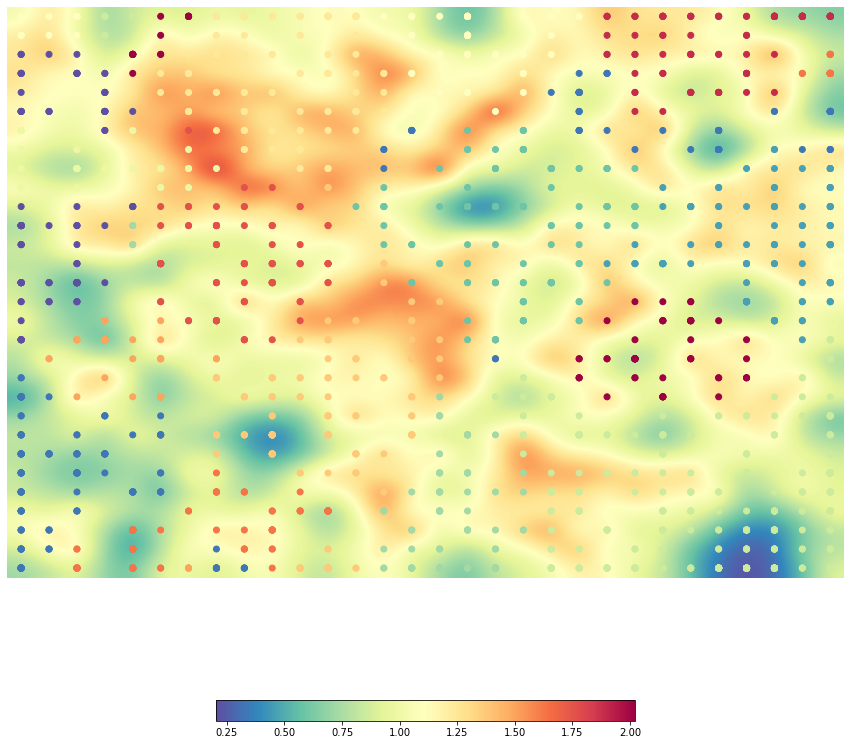

In [ ]:
som_clustering(som30,ubmus_30,15)

#### k = 20

-------------------------------------------------------------- k = 20  --------------------------------------------------------------

 Som Clusters 
[[ 4  4  4 18 18 11 11  7  7  7  7  7  7  7  7  4  4  4  4  4 16 16 16 16 16 15 15 15 15 15]
 [ 4  4  4 18 11 11 11  7  7  7  7  7  7  7  7  4  4  4  4  4 16 16 16 16 16 15 15 15 15 15]
 [ 4  4  2 11 11 11  7  7  7  7  7  7  7  7  4  4  4  4  4  4 16 16 16 16 16 15 15 15 15 15]
 [ 2  2  2  2 11  7  7  7  7  7  7  7  7  7  4  4  4  4  4  4  1 16 16 16 16 15 15 15 15 15]
 [ 2  2  2  2  2  7  7  7  7  7  7  7  7  7  4  4  4  4  4  1  1  1 16 16  1  1 15 15 15 15]
 [ 2  2  2  2  2 11  7  7  9  9  7  7  7  4  4  4  4  4  3  1  1  1 16 16  1  1 15 15 15 15]
 [ 2  2  2  2  2  2  9  9  9  9  9  9  7  1  1  1  3  3  3  3  1  1  1 13 13 13 13 13  1  1]
 [ 2  2  2  2  2 19 19  9  9  9  9  9  1  1  1  3  3  3  3  3  3 17 13 13 13 13 13 13 13 13]
 [ 2  2  2  2 19 19 19 19  9  9  9  9  9  1  1  3  3  3  3  3  3 17 17 17 13 13 13 13 13 13]
 [ 2  2  2  2

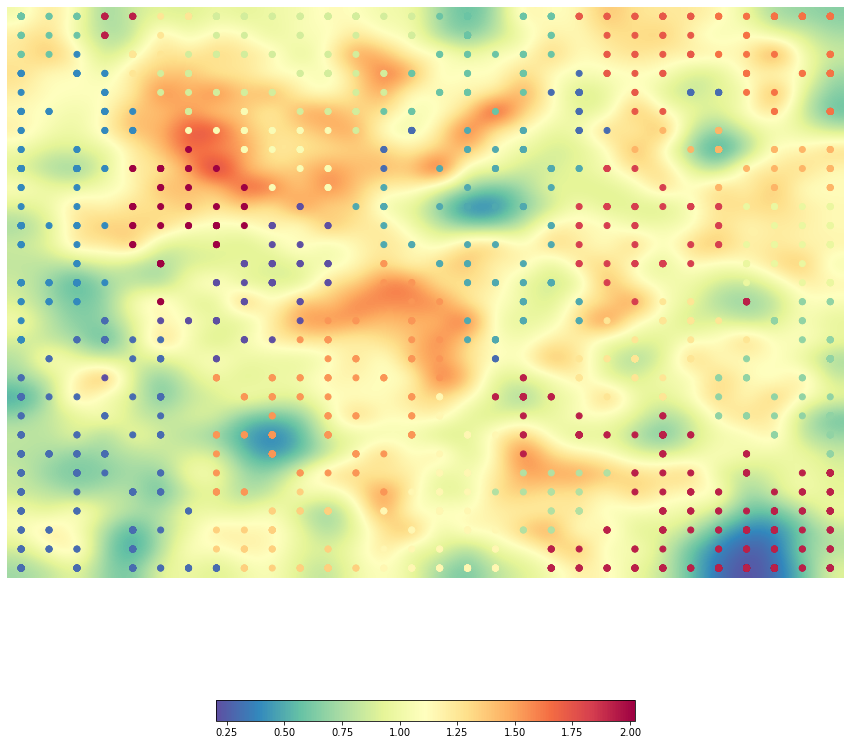

In [ ]:
som_clustering(som30,ubmus_30,20)

#### k = 25

-------------------------------------------------------------- k = 25  --------------------------------------------------------------

 Som Clusters 
[[ 4  4  4  1  1  6  6  6  6  6 18 18 18 18 18  4  4  4  4  4  4  5  5  5  5  5 21 21 21 21]
 [ 4  4  4  1  1  6  6  6  6 18 18 18 18 18 18  4  4  4  4  4  4  5  5  5  5  5 21 21 21 21]
 [ 4  4  3 14 14  6  6  6  6 18 18 18 18 18  4  4  4  4  4  4  9  9  5  5  5  5 21 21 21 21]
 [11  3  3  3 14  6  6  6  6 18 18 18 18 18 18  4  4  4  4  4  9  9  5  5  5 21 21 21 21 21]
 [11 11  3 14 14  6  6  6 23 23 18 18 18 18  4  4  4  4  4  9  9  9  9  5 19 19 21 21 21 21]
 [11 11 11 11 11  6  6  6 23 23 23 23 18 18  4  4  4 22 22  9  9  9  9  9 19 19 21 21 21 21]
 [11 11 11 11 11 11  6 23 23 23 23 23 18 19 19 19 22 22 22 22  9  9  9  9 19 19 19 19 19 19]
 [11 11 11 11 11 11 11 23 23 23 23 23 19 19 19 13 22 22 22 22 22 22  9  9 19 19 19 12 19 14]
 [11 11 11 11 11 11 11 11 23 23 23 23 23 19 19 13 13 22 22 22 22 22  8  8 19 19 12 12 12 12]
 [11 11 11 11

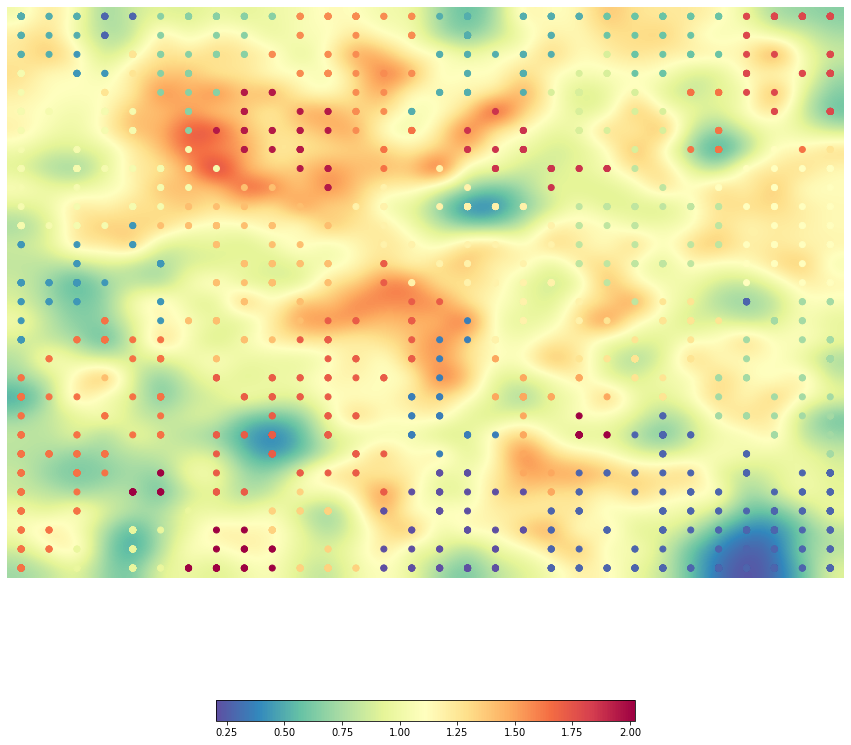

In [ ]:
som_clustering(som30,ubmus_30,25)

#### k = 30

-------------------------------------------------------------- k = 30  --------------------------------------------------------------

 Som Clusters 
[[25 25 25 25 25 25 22 21 21 21 21 21 21 21 21 25 25 25 12 12 12 29 29 29 29  2  2  2  2  2]
 [25 25 25 25 25 22 22 22 21 21 21 21 21 21 21 25 25 25 12 12 12 29 29 29 29  2  2  2  2  2]
 [25 25 25 25 25 22 22 22 21 21 21  5  5  5 21 25 25 12 12 12 12 29 29 29 29  2  2  2 20 20]
 [25 25 25 25 25 22 22 22 21 21  5  5  5  5  5 12 12 12 12 12 12 12 29 29 29  2  2  2 20 20]
 [10 10 19 13 13 22 22 22 21 21 21  5  5  5  5 12 12 12 12 12 12 12 12  6  6  9  2  2  2 20]
 [10 10 10 10 10 22 22 22 21 18 18  5  5  5  5  5 12 12 11 12 12 12 12 12  6  6  6  2  6  6]
 [10 10 10 10 10 10 22 18 18 18 18 18  5  5  6  6 11 11 11 11  6  6 12  0  0  0  0  6  6  6]
 [10 10 10 10 10 10 10 18 18 18 18 18  5  6  6 11 11 11 11 11 11  0  0  0  0  0  0  0  6  6]
 [10 10 10 10 10 10 10 10 18 18 18 18 18  5  5 11 11 11 11 11 11  7  7  7  0  0  0  0 27 27]
 [10 10 10 10

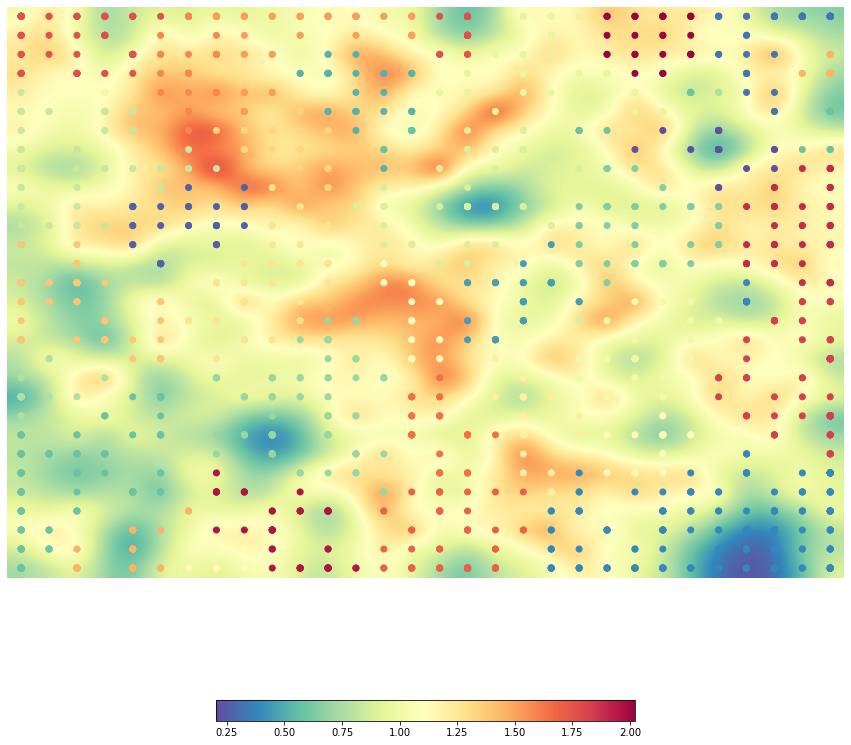

In [ ]:
som_clustering(som30,ubmus_30,30)

## Επιλογή βέλτιστων παραμέτρων

Τα καλύτερα αποτελέσματα προκύπτουν για grid διαστάσεων **20 x 20** και **k = 25** ή **k=30**. Δοκιμάζοντας και τις δύο διαφορετικές τιμές του k το καλύτερο αποτέλεσμα προέκυψε τελικά για **k=25** και είναι αυτό το οποίο παρουσιάζουμε στη συνέχεια.  Όπως φαίνεται παραπάνω για τις τιμές αυτές των παραμέτρων (grid 20 x 20 και k = 25), οι πέντε μεγαλύτερες συστάδες αφορούν τις εξής θεματικές κατηγορίες: "Comedy", "Thriller-Horror", "Drama" και "Documentary". Οι κατηγορίες αυτές είναι αντιπροσωπευτικές του dataset μας καθώς οι τρείς από αυτές και συγκεκριμένα οι "Comedy", "Thriller-Horror" και "Drama" ανήκουν στις μεγαλύτερες κατηγορίες ταινιών για τα δεδομένα μας. Επιπλέον, παρατηρούμε ότι εντός των αντίστοιχων συστάδων οι κατηγορίες αυτές περιέχονται σε μεγάλη συχνότητα.  Με χρήση μεγαλύτερου grid και με αυξημένη τιμή του k, παρατηρήσαμε ότι οι μεγάλες οικογένειες κατηγοριών άρχιζαν να διασπάζονται σε μικρότερες, ενώ εμφανίζονταν αρκετές επικαλύψεις στις κατηγορίες των διαφορετικών clusters.


### Εκπαίδευση χάρτη SOM



Με τις παραμέτρους αυτές εκπαιδεύουμε ολόκληρο το dataset. Χρησιμοποιούμε το final_set (αντί του reduced_final_set) το οποίο έχει διαστάσεις (5000,2000) αφού έχει μετασχηματιστεί μέσω PCA.

In [ ]:
n_rows, n_columns = 20, 20
som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
%time som.train(final_set, epochs=100)

CPU times: user 30min 48s, sys: 3.44 s, total: 30min 51s
Wall time: 15min 52s


In [ ]:
joblib.dump(som, 'som.pkl') 

['som.pkl']

### Best matching units


In [ ]:
som = joblib.load('som.pkl')  

In [ ]:
bmus = som.bmus
print(bmus.shape)

(5000, 2)


In [ ]:
ubmus, indices = np.unique(bmus, return_inverse=True, axis=0)
print(ubmus.shape)

(332, 2)


### Ομαδοποίηση (Clustering)

In [ ]:
k = 25
som.cluster(KMeans(n_clusters=k))

In [ ]:
print(som.clusters)

[[ 2  2 12 12 14 14 14 23 23 23  0  0  0  0 17 17 17 17 17 17]
 [ 2  2 12 16 14 14 14 23 23 23  0  0  0  0 17 17 17 17 17  4]
 [16 16 16 16 16 14 14 23 23 22 22  0  0  0 17 17  4  4  4  4]
 [16 16 16 16 16 16 16 18 18 22 22 22  0  0  0  4  4  4  4  4]
 [16 16 16 16 16 16 16 18 18 18 22 22 22 24  4  4  4  4  4  4]
 [16 16 16 16 16 16 16 18 18 18 18 18  1  1  1  4  4  4  4  4]
 [ 5  5 16 16 16 16 16 18 18 18 18  1  1  1  1  1  2  2  2  2]
 [ 5  5 16 16 16 19 19 24 24 24 24 14  1  1  1  1  2  2  2  2]
 [ 5  5  5 16 19 19 24 24 24 24 24 11 11  1  1  1  1  2  2 12]
 [ 5  5  5 19 19 19 24 24 24 24 11 11 11 11 11  1  1 12 12 12]
 [ 5  5  5 19  8  8  8  8  8 11 11 11 11 11 21 21 21 12 12 12]
 [ 5  6  6  6  8  8  8  8  8  8 11 11 11 11 21 21 21 12 12 12]
 [ 6  6  6  6  8  8  8  8  8  8  8 11 11 11 21 21 21 12 12 12]
 [ 6  6  6  6  6  7  8  8  8  8 13 13 13 13 11 11 11 11 12 11]
 [ 6  6  6  6  7  7  7 15  8 13 13 13 13 13 11 11 11 11  9  9]
 [ 6 10 10  7  7  7 15 15 15 13 13 13 13 13 11 11 11  9

In [ ]:
unique_values, counts = np.unique(som.clusters, return_counts=True)
arr = np.asarray((unique_values, counts))
sorted_arr = arr[ :, arr[1].argsort()]
print("\033[1m Clusters sorted by increasing number of neurons: \033[0m")
print("Cluster index")
print("Number of neurons")
print(sorted_arr)

 Clusters sorted by increasing number of neurons: 
Cluster index
Number of neurons
[[22 19 23 21  7 14  9 10 20 17  0 18 13 24  5  2  3  6 12  1  4  8 11 16 15]
 [ 8  8  8  9  9  9 10 12 13 13 14 14 14 14 14 14 15 17 17 18 21 23 33 36 37]]


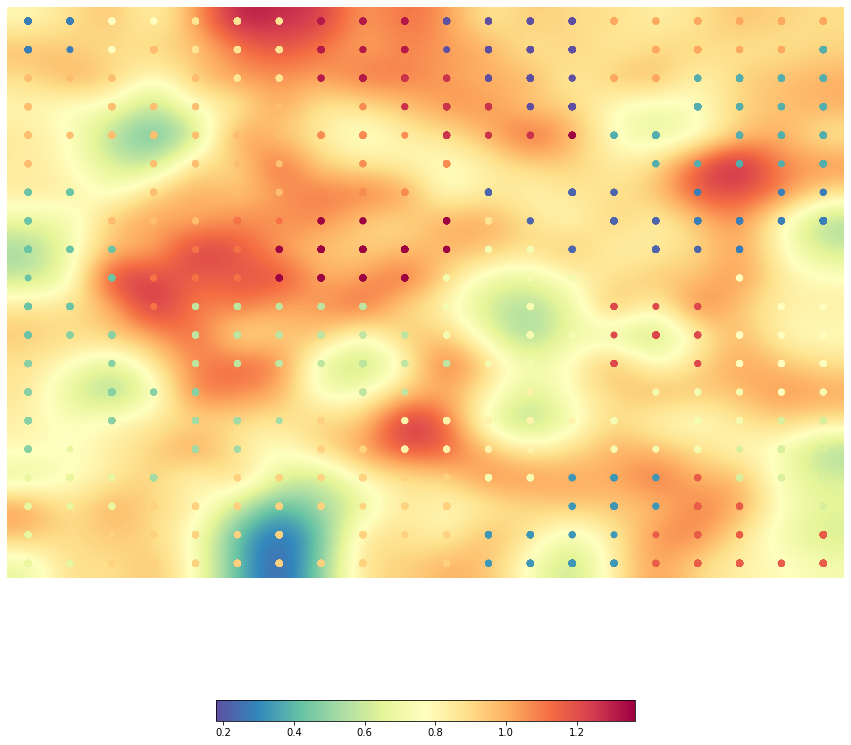

In [ ]:
som.view_umatrix(bestmatches=True, colorbar=True, figsize=(15, 15)); matplotlib.pyplot.show()

In [ ]:
for i in range(k):
        print("---------------------------------------------------------------------------------\033[1m Cluster {} \033[0m---------------------------------------------------------------------------------".format(i))
        print()
        cluster_coordinates = print_cluster_neurons_movies_report(som,ubmus,i)
        cluster_movies_ids = neuron_movies_report(som,cluster_coordinates)
        _ = print_categories_stats(cluster_movies_ids)
        print()

--------------------------------------------------------------------------------- Cluster 0 ---------------------------------------------------------------------------------

Overall Cluster Genres stats:
[('"Thriller"', 152), ('"Action"', 150), ('"Action/Adventure"', 128), ('"Action Thrillers"', 39), ('"Crime Fiction"', 34), ('"Crime Thriller"', 29), ('"Science Fiction"', 27), ('"World cinema"', 25), ('"Martial Arts Film"', 24), ('"Comedy"', 15), ('"Horror"', 14), ('"Adventure"', 14), ('"Fantasy"', 13), ('"Chinese Movies"', 11), ('"Disaster"', 11), ('"Drama"', 9), ('"Mystery"', 8), ('"Gangster Film"', 7), ('"Spy"', 7), ('"Superhero movie"', 7), ('"Television movie"', 7), ('"Indie"', 7), ('"Superhero"', 6), ('"Suspense"', 6), ('"Chase Movie"', 6), ('"War film"', 6), ('"Airplanes and airports"', 5), ('"Black comedy"', 4), ('"Japanese Movies"', 4), ('"Psychological thriller"', 4), ('"Political thriller"', 4), ('"Bollywood"', 4), ('"Creature Film"', 3), ('"Animation"', 3), ('"Detective"',

Από μία γρήγορη επισκόπηση των συστάδων παρατηρούμε πως ο χάρτης που προέκυψε ανταποκρίνεται στο dataset μας. Πράγματι η μεγαλύτερη είναι η 15 (με σύνολο 37 νευρώνες) για την οποία η συντριπτική πλειοψηφία των ταινιών ανήκουν στην κατηγορία "Drama". Ακολουθούν οι 16 (σύνολο 36 νευρώνες) και 11 (σύνολο 33) οι οποίες περιέχουν κατά βάση κωμωδίες και ρομαντικές ταινίες αντίστοιχα. Τέλος, μεταξύ των πέντε μεγαλύτερων είναι και τα clusters 8 (σύνολο 23 νευρώνες) και 4 (σύνολο 21) τα οποία αφορούν κυρίως ταινίες τρόμου και θρίλερ. Θυμίζουμε πως για τα δεδομένα μας οι αντίστοιχες πέντε μεγαλύτερες κατηγορίες ταινιών είναι σε αύξουσα σειρά οι εξής: "Action", "Thriller", "Romance Film", "Comedy" και "Drama". Βλέπουμε επομένως πως οι συστάδες με τους περισσότερους νευρώνες είναι εκείνες για τις οποίες η κατηγορία με την μεγαλύτερη πληθικότητα είναι μία από τις παραπάνω. 

## Ανάλυση τοπολογικών ιδιοτήτων χάρτη SOM

Μετά το πέρας της εκπαίδευσης και του clustering θα έχουμε ένα χάρτη με τοπολογικές ιδιότητες ως προς τα είδη των ταινιών της συλλογής μας, κάτι αντίστοιχο με την εικόνα στην αρχή της Εφαρμογής 2 αυτού του notebook (η συγκεκριμένη εικόνα είναι μόνο για εικονογράφιση, δεν έχει καμία σχέση με τη συλλογή δεδομένων και τις κατηγορίες μας).

Για τον τελικό χάρτη SOM, αναλύουμε σε markdown με συγκεκριμένη αναφορά σε αριθμούς clusters και τη σημασιολογική ερμηνεία τους τις εξής τρεις τοπολογικές ιδιότητες του SOM: 





**1.** **Δεδομένα που έχουν μεγαλύτερη πυκνότητα πιθανότητας στο χώρο εισόδου τείνουν να απεικονίζονται με περισσότερους νευρώνες στο χώρο μειωμένης διαστατικότητας.** 



Για την απόδειξη του (1) πραγματοποιούμε την ακόλουθη διαδικασία. Αρχικά, για κάθε νευρώνα στο grid 20 x 20 βρίσκουμε μέσω της `neuron_movies_report` την λίστα με τα IDs των ταινιών για τα οποία (αν υπάρχουν) ο νευρώνας αυτός αναδείχθηκε νικητής. Στη συνέχεια η `print_categories_stats` με όρισμα τα IDs, επιστρέφει μία νέα λίστα από tuples της μορφής (Category, Counts) η οποία γίνεται κάθε φορά extend στην `neurons_categories_stats`. Η λίστα αυτή τελικά περιέχει την στατιστική των κατηγοριών των ταινιών για όλους τους νευρώνες. Έπειτα, βρίσκουμε τις μοναδικές κατηγορίες που υπάρχουν σε ολόκληρο το dataset μας και για κάθε μία από αυτές τον αριθμό των νευρώνων στους οποίους εμφανίζονται τουλάχιστον μία φορά. Αυτό πραγματοποιείται μέσω της βοηθητικής συνάρτησης `number_of_neurons_in_category` η οποία για μία δεδομένη κατηγορία διατρέχει την λίστα από tuples `neurons_categories_stats` και κάθε φορά που την συναντά αυξάνει κατά ένα τον αριθμό των εμφανίσεών της. Σημειώνουμε πως από το tuple (Category, Counts) δεν μας ενδιαφέρει η μεταβλητή Counts καθώς μας νοιάζει να βρούμε σε πόσους διαφορετικούς νευρώνες απεικονίζεται μία κατηγορία και όχι πόσες ταινίες τύπου Category απεικονίζονται στο σύνολο των νευρώνων του grid. Τελικά, τυπώνουμε τον πίνακα `final` διαστάσεων (271,2) (271 είναι ο αριθμός των διαφορετικών κατηγοριών του dataset μας) ο οποίος περιέχει τις κατηγορίες σε αύξουσα σειρά αριθμού νευρώνων στους οποίους απεικονίζονται. 

Ακολούθως φαίνεται ο κώδικας για την υλοποίηση της διαδικασίας που μόλις περιγράψαμε. Η συνάρτηση `print_categories_stats` είναι ίδια με αυτήν που χρησιμοποιήσαμε στην ενότητα "Σημασιολογική ερμηνεία των clusters" με την διαφορά ότι έχουμε βάλει σε σχόλια τις γραμμές κώδικα που αφορούν τις εκτυπώσεις (prints).

In [ ]:
def print_categories_stats(IDs):
    total_categories = []
    for movie_id in IDs:
        movie_categories = categories[movie_id][0].split(",")  
        for i in range(len(movie_categories)):
            total_categories.extend([movie_categories[i].strip()])
    unique_categories, counts = np.unique(total_categories, return_counts=True)
    largest_categories_indexes = np.argsort(counts)[::-1]
    result = [(unique_categories[index],counts[index]) for index in largest_categories_indexes]
    #print("Overall Cluster Genres stats:") 
    #print(result)
    return result

In [ ]:
def number_of_neurons_in_category(category):
    cnt = 0                                                                     # Αρχικοποιούμε τον μετρητή με τους διαφορετικούς νευρώνες στους οποίους απεικονίζεται μία κατηγορίας
    for (cat,_) in neurons_categories_stats:                                    # Διατρέχουμε την λίστα neurons_categories_stats
        if cat==category:                                                       # και αν συναντήσουμε την κατηγορία που εξετάζουμε
           cnt+=1                                                               # αυξάνουμε τον μετρητή κατά ένα
    return cnt                                                                  # Επιστρέφουμε τον μετρητή

In [ ]:
neurons_categories_stats = []                                                   # Αρχικοποιούμε μία λίστα με την στατιστική των κατηγοριών των ταινιών για όλους τους νευρώνες του πλέγματος
for i in range(20):  
    for j in range(20):                                                         # Για κάθε νευρώνα στο 20 x 20 grid
          neuron_IDs_list = neuron_movies_report(som,[[i,j]])                   # βρίσκουμε τα IDs των ταινιών
          neuron_categories_stats = print_categories_stats(neuron_IDs_list)     # τη στατιστική των κατηγοριών τους
          neurons_categories_stats.extend(neuron_categories_stats)              # και την κάνουμε append στη συνολική λίστα

total_categories = []                                                           # Αρχικοποιούμε τη λίστα με όλες τις κατηγορίες του dataset μας
for i in range(categories.shape[0]):                                            # Για όλες τις ταινίες (σύνολο 5000)
    cat = [category.strip() for category in categories[i][0].split(",")]        # βρίσκουμε την λίστα με τις κατηγορίες τους
    total_categories.extend(cat)                                                # και την κάνουμε extend στη συνολική λίστα
unique_categories = np.unique(total_categories)                                 # Βρίσκουμε τις μοναδικές κατηγορίες (σύνολο 271) του dataset μας

final = []
for category in unique_categories:                                              # Για κάθε μοναδική κατηγορία
    final.append((category,number_of_neurons_in_category(category)))            # βρίσκουμε τον αριθμό των νευρώνων στους οποίους απεικονίζεται και το κάνουμε append στη λίστα final
final_sorted = sorted(final, key=lambda x: x[1])                                # Ταξινομούμε τη λίστα σε αύξουσα σειρά αριθμού νευρώνων

final = np.asarray(final_sorted)                                                # Μετατρέπουμε την ταξινομημένη λίστα σε πίνακα
print(final)                                                                    # Τυπώνουμε τον πίνακα

[['"Archives and records"' '1']
 ['"Baseball"' '1']
 ['"Biker Film"' '1']
 ['"Bloopers & Candid Camera"' '1']
 ['"British Empire Film"' '1']
 ['"British New Wave"' '1']
 ['"Buddy cop"' '1']
 ['"Cold War"' '1']
 ['"Coming-of-age film"' '1']
 ['"Computers"' '1']
 ['"Crime"' '1']
 ['"Cyberpunk"' '1']
 ['"Ealing Comedies"' '1']
 ['"Early Black Cinema"' '1']
 ['"Essay Film"' '1']
 ['"Exploitation"' '1']
 ['"Extreme Sports"' '1']
 ['"Foreign legion"' '1']
 ['"Gender Issues"' '1']
 ['"Gulf War"' '1']
 ['"Historical Documentaries"' '1']
 ['"Illnesses & Disabilities"' '1']
 ['"Interpersonal Relationships"' '1']
 ['"Libraries and librarians"' '1']
 ['"Master Criminal Films"' '1']
 ['"Northern"' '1']
 ['"Nuclear warfare"' '1']
 ['"Parkour in popular culture"' '1']
 ['"Psychological horror"' '1']
 ['"Punk rock"' '1']
 ['"Race movie"' '1']
 ['"Roadshow/Carny"' '1']
 ['"Sci Fi Pictures original films"' '1']
 ['"Space western"' '1']
 ['"Steampunk"' '1']
 ['"Supermarionation"' '1']
 ['"Tollywood"' '1'

Για να ισχύει η πρόσταση (1) θα πρέπει οι κατηγορίες με την μεγαλύτερη πληθικότητα στο dataset μας να απεικονίζονται σε περισσότερους νευρώνες. Πράγματι οι πέντε πιο συχνές κατηγορίες "Drama" (σύνολο 2324 ταινίες), "Comedy" (σύνολο 1246), "Romance Film" (σύνολο 772), "Thriller" (σύνολο 753) και "Action" (σύνολο 681) απεικονίζονται αντίστοιχα σε 159, 122, 91, 89 και 94 νευρώνες. Αντίστροφα, οι πέντε πιο σπάνιες κατηγορίες "Crime", "Cyberpunk", "Baseball", "Master Criminal Films" και "Gulf War" με σύνολο 1 ταινία η καθεμία απεικονίζονται σε ένα μόνο νευρώνα.  

**2. Μακρινά πρότυπα εισόδου τείνουν να απεικονίζονται απομακρυσμένα στο χάρτη. Υπάρχουν χαρακτηριστικές κατηγορίες ταινιών που ήδη από μικρούς χάρτες τείνουν να τοποθετούνται σε διαφορετικά ή απομονωμένα σημεία του χάρτη.**


<font color='blue'>παράδειγμα:</font> Clusters 6 - 17

In [ ]:
cluster = 6
cluster_coordinates = print_cluster_neurons_movies_report(som,ubmus,cluster)
cluster_movies_ids = neuron_movies_report(som,cluster_coordinates)
cluster_category_stats = print_categories_stats(cluster_movies_ids)
print("Overall Cluster Genres stats:") 
print(cluster_category_stats)

Overall Cluster Genres stats:
[('"Comedy"', 231), ('"Drama"', 230), ('"Comedy-drama"', 52), ('"Indie"', 48), ('"World cinema"', 42), ('"Romance Film"', 34), ('"Black comedy"', 21), ('"Family Film"', 20), ('"Crime Fiction"', 17), ('"Black-and-white"', 14), ('"Coming of age"', 13), ('"Teen"', 11), ('"Period piece"', 10), ('"Adventure"', 10), ('"Ensemble Film"', 9), ('"Sports"', 9), ('"Action"', 8), ('"Family Drama"', 8), ('"Musical"', 8), ('"Parody"', 7), ('"Children\'s/Family"', 6), ('"Satire"', 5), ('"Fantasy"', 5), ('"Science Fiction"', 4), ('"Romantic comedy"', 4), ('"Road movie"', 4), ('"Japanese Movies"', 4), ('"Art film"', 4), ('"Political cinema"', 4), ('"Animal Picture"', 4), ('"Childhood Drama"', 4), ('"Music"', 4), ('"Buddy film"', 4), ('"Comedy film"', 3), ('"Film adaptation"', 3), ('"Comedy of manners"', 3), ('"New Hollywood"', 3), ('"Cult"', 3), ('"Political drama"', 3), ('"Filipino Movies"', 3), ('"Slice of life story"', 3), ('"Tragicomedy"', 2), ('"Chinese Movies"', 2), (

In [ ]:
cluster = 17
cluster_coordinates = print_cluster_neurons_movies_report(som,ubmus,cluster)
cluster_movies_ids = neuron_movies_report(som,cluster_coordinates)
cluster_category_stats = print_categories_stats(cluster_movies_ids)
print("Overall Cluster Genres stats:") 
print(cluster_category_stats)

Overall Cluster Genres stats:
[('"Thriller"', 189), ('"Crime Fiction"', 170), ('"Drama"', 152), ('"Crime Thriller"', 76), ('"Action"', 76), ('"Mystery"', 70), ('"Action/Adventure"', 32), ('"Film noir"', 23), ('"Psychological thriller"', 22), ('"Black-and-white"', 22), ('"Romance Film"', 21), ('"Indie"', 21), ('"World cinema"', 21), ('"Detective"', 20), ('"Suspense"', 16), ('"Detective fiction"', 15), ('"Crime Drama"', 14), ('"Comedy"', 13), ('"Film adaptation"', 12), ('"Gangster Film"', 12), ('"Action Thrillers"', 10), ('"Period piece"', 8), ('"Adventure"', 8), ('"Horror"', 7), ('"Romantic drama"', 6), ('"Japanese Movies"', 6), ('"Television movie"', 5), ('"Political thriller"', 5), ('"Black comedy"', 4), ('"Martial Arts Film"', 4), ('"Blaxploitation"', 4), ('"Spy"', 4), ('"Political drama"', 4), ('"Chinese Movies"', 3), ('"Biographical film"', 3), ('"Erotic thriller"', 3), ('"Fantasy"', 3), ('"Comedy Thriller"', 3), ('"Supernatural"', 3), ('"Western"', 3), ('"Courtroom Drama"', 2), ('

Ισχύει ότι για δύο μακρινά clusters όπως είναι το 6 και το 17 το είδος των ταινιών που αντιπροσωπεύουν (κωμωδία και θρίλερ αντίστοιχα) διαφέρει σημαντικά.

**3. Κοντινά πρότυπα εισόδου τείνουν να απεικονίζονται κοντά στο χάρτη. Σε μεγάλους χάρτες εντοπίστε είδη ταινιών και κοντινά τους υποείδη.**

<font color='blue'>1ο παράδειγμα:</font> Clusters 4 - 17

In [ ]:
cluster = 4
cluster_coordinates = print_cluster_neurons_movies_report(som,ubmus,cluster)
cluster_movies_ids = neuron_movies_report(som,cluster_coordinates)
cluster_category_stats = print_categories_stats(cluster_movies_ids)
print("Overall Cluster Genres stats:") 
print(cluster_category_stats)

Overall Cluster Genres stats:
[('"Thriller"', 279), ('"Drama"', 108), ('"Horror"', 92), ('"Mystery"', 85), ('"Psychological thriller"', 72), ('"Crime Thriller"', 50), ('"Suspense"', 39), ('"World cinema"', 35), ('"Supernatural"', 29), ('"Indie"', 25), ('"Black-and-white"', 16), ('"Science Fiction"', 15), ('"Film adaptation"', 14), ('"Crime Fiction"', 13), ('"Erotic thriller"', 11), ('"Television movie"', 10), ('"Comedy"', 10), ('"Film noir"', 9), ('"Slasher"', 8), ('"Detective"', 7), ('"Romance Film"', 6), ('"Teen"', 6), ('"Fantasy"', 5), ('"Short Film"', 5), ('"Political thriller"', 5), ('"Political drama"', 5), ('"Adventure"', 5), ('"Detective fiction"', 4), ('"Creature Film"', 4), ('"Gothic Film"', 4), ('"Japanese Movies"', 4), ('"Action"', 4), ('"Black comedy"', 3), ('"Comedy film"', 3), ('"Spy"', 3), ('"Giallo"', 3), ('"Musical"', 3), ('"Docudrama"', 2), ('"Satire"', 2), ('"Action/Adventure"', 2), ('"War film"', 2), ('"Chinese Movies"', 2), ('"Crime Drama"', 2), ('"Social problem 

In [ ]:
cluster = 17
cluster_coordinates = print_cluster_neurons_movies_report(som,ubmus,cluster)
cluster_movies_ids = neuron_movies_report(som,cluster_coordinates)
cluster_category_stats = print_categories_stats(cluster_movies_ids)
print("Overall Cluster Genres stats:") 
print(cluster_category_stats)

Overall Cluster Genres stats:
[('"Thriller"', 189), ('"Crime Fiction"', 170), ('"Drama"', 152), ('"Crime Thriller"', 76), ('"Action"', 76), ('"Mystery"', 70), ('"Action/Adventure"', 32), ('"Film noir"', 23), ('"Psychological thriller"', 22), ('"Black-and-white"', 22), ('"Romance Film"', 21), ('"Indie"', 21), ('"World cinema"', 21), ('"Detective"', 20), ('"Suspense"', 16), ('"Detective fiction"', 15), ('"Crime Drama"', 14), ('"Comedy"', 13), ('"Film adaptation"', 12), ('"Gangster Film"', 12), ('"Action Thrillers"', 10), ('"Period piece"', 8), ('"Adventure"', 8), ('"Horror"', 7), ('"Romantic drama"', 6), ('"Japanese Movies"', 6), ('"Television movie"', 5), ('"Political thriller"', 5), ('"Black comedy"', 4), ('"Martial Arts Film"', 4), ('"Blaxploitation"', 4), ('"Spy"', 4), ('"Political drama"', 4), ('"Chinese Movies"', 3), ('"Biographical film"', 3), ('"Erotic thriller"', 3), ('"Fantasy"', 3), ('"Comedy Thriller"', 3), ('"Supernatural"', 3), ('"Western"', 3), ('"Courtroom Drama"', 2), ('

Παρατηρούμε πως τα clusters 4 και 17 είναι γειτονικά και συγκεκριμένα καταλαμβάνουν την άνω δεξιά γωνία του χάρτη. Επιπλέον, η κυρίαρχη κατηγορία ταινιών και στα δύο είναι τύπου "Thriller", ενώ διακρίνουμε και άλλες συναφείς με αυτήν όπως π.χ. "Drama", "Horror", "Crime" κτλ.

<font color='blue'>2ο παράδειγμα:</font> Clusters 10 - 15

In [ ]:
cluster = 10
cluster_coordinates = print_cluster_neurons_movies_report(som,ubmus,cluster)
cluster_movies_ids = neuron_movies_report(som,cluster_coordinates)
cluster_category_stats = print_categories_stats(cluster_movies_ids)
print("Overall Cluster Genres stats:") 
print(cluster_category_stats)

Overall Cluster Genres stats:
[('"Drama"', 224), ('"Indie"', 102), ('"Black-and-white"', 94), ('"Crime Fiction"', 83), ('"Silent film"', 33), ('"Action"', 15), ('"Film adaptation"', 14), ('"Crime Drama"', 12), ('"Melodrama"', 11), ('"Family Drama"', 11), ('"Comedy-drama"', 10), ('"Film noir"', 10), ('"Period piece"', 9), ('"Musical"', 8), ('"Romance Film"', 7), ('"Sports"', 7), ('"Mystery"', 7), ('"Action/Adventure"', 6), ('"Comedy"', 6), ('"Romantic drama"', 6), ('"Courtroom Drama"', 5), ('"Coming of age"', 5), ('"Chinese Movies"', 4), ('"Short Film"', 4), ('"Science Fiction"', 4), ('"Boxing"', 4), ('"Musical Drama"', 4), ('"Horror"', 3), ('"Christian film"', 3), ('"Historical fiction"', 3), ('"Western"', 3), ('"Gangster Film"', 3), ('"Fantasy"', 3), ('"Japanese Movies"', 3), ('"Ensemble Film"', 3), ('"World cinema"', 3), ('"Social problem film"', 3), ('"Political drama"', 3), ('"Psychological thriller"', 3), ('"Teen"', 3), ('"Road movie"', 3), ('"Television movie"', 2), ('"Remake"', 

In [ ]:
cluster = 15
cluster_coordinates = print_cluster_neurons_movies_report(som,ubmus,cluster)
cluster_movies_ids = neuron_movies_report(som,cluster_coordinates)
cluster_category_stats = print_categories_stats(cluster_movies_ids)
print("Overall Cluster Genres stats:") 
print(cluster_category_stats)

Overall Cluster Genres stats:
[('"Drama"', 756), ('"War film"', 62), ('"Period piece"', 50), ('"Action"', 43), ('"Comedy film"', 42), ('"Biographical film"', 38), ('"Adventure"', 28), ('"Television movie"', 28), ('"Film adaptation"', 25), ('"Biography"', 24), ('"Biopic [feature]"', 23), ('"Historical fiction"', 23), ('"Musical"', 23), ('"Political drama"', 19), ('"Horror"', 19), ('"Science Fiction"', 18), ('"Docudrama"', 18), ('"Coming of age"', 15), ('"Sports"', 15), ('"Fantasy"', 13), ('"Melodrama"', 11), ('"Short Film"', 10), ('"Black-and-white"', 10), ('"History"', 10), ('"Crime Fiction"', 9), ('"Silent film"', 9), ('"Comedy-drama"', 9), ('"Mystery"', 8), ('"Japanese Movies"', 8), ('"Action/Adventure"', 8), ('"Romantic drama"', 8), ('"Courtroom Drama"', 7), ('"Costume drama"', 7), ('"Chinese Movies"', 7), ('"Historical drama"', 7), ('"Western"', 6), ('"Music"', 6), ('"Crime Drama"', 6), ('"Teen"', 6), ('"Romance Film"', 5), ('"Gangster Film"', 5), ('"Social problem film"', 5), ('"E

Ομοίως τα clusters 10 και 15 βρίσκονται στην κάτω αριστερή γωνία του χάρτη και αφορούν κυρίως ταινίες "Drama".

<font color='blue'>3ο παράδειγμα:</font> Clusters 5 - 6 - 16 

In [ ]:
cluster = 5
cluster_coordinates = print_cluster_neurons_movies_report(som,ubmus,cluster)
cluster_movies_ids = neuron_movies_report(som,cluster_coordinates)
cluster_category_stats = print_categories_stats(cluster_movies_ids)
print("Overall Cluster Genres stats:") 
print(cluster_category_stats)

Overall Cluster Genres stats:
[('"Comedy"', 184), ('"Romance Film"', 184), ('"Romantic comedy"', 157), ('"Drama"', 61), ('"Indie"', 38), ('"Comedy-drama"', 35), ('"Romantic drama"', 24), ('"Black-and-white"', 20), ('"Screwball comedy"', 13), ('"Coming of age"', 12), ('"Musical"', 12), ('"Teen"', 11), ('"Black comedy"', 11), ('"Fantasy"', 10), ('"Parody"', 9), ('"Film adaptation"', 8), ('"Slapstick"', 8), ('"Sex comedy"', 8), ('"Comedy of manners"', 7), ('"Period piece"', 6), ('"Comedy of Errors"', 5), ('"Crime Fiction"', 5), ('"Slice of life story"', 5), ('"Family Film"', 5), ('"Ensemble Film"', 4), ('"Media Satire"', 4), ('"Gross out"', 4), ('"Gross-out film"', 4), ('"Action/Adventure"', 4), ('"World cinema"', 4), ('"Satire"', 4), ('"Musical comedy"', 4), ('"Mystery"', 3), ('"Workplace Comedy"', 3), ('"Pre-Code"', 3), ('"Thriller"', 3), ('"Adventure"', 3), ('"Romantic fantasy"', 3), ('"Sports"', 3), ('"Buddy film"', 3), ('"Comedy film"', 3), ('"Short Film"', 2), ('"Domestic Comedy"', 

In [ ]:
cluster = 6
cluster_coordinates = print_cluster_neurons_movies_report(som,ubmus,cluster)
cluster_movies_ids = neuron_movies_report(som,cluster_coordinates)
cluster_category_stats = print_categories_stats(cluster_movies_ids)
print("Overall Cluster Genres stats:") 
print(cluster_category_stats)

Overall Cluster Genres stats:
[('"Comedy"', 231), ('"Drama"', 230), ('"Comedy-drama"', 52), ('"Indie"', 48), ('"World cinema"', 42), ('"Romance Film"', 34), ('"Black comedy"', 21), ('"Family Film"', 20), ('"Crime Fiction"', 17), ('"Black-and-white"', 14), ('"Coming of age"', 13), ('"Teen"', 11), ('"Period piece"', 10), ('"Adventure"', 10), ('"Ensemble Film"', 9), ('"Sports"', 9), ('"Action"', 8), ('"Family Drama"', 8), ('"Musical"', 8), ('"Parody"', 7), ('"Children\'s/Family"', 6), ('"Satire"', 5), ('"Fantasy"', 5), ('"Science Fiction"', 4), ('"Romantic comedy"', 4), ('"Road movie"', 4), ('"Japanese Movies"', 4), ('"Art film"', 4), ('"Political cinema"', 4), ('"Animal Picture"', 4), ('"Childhood Drama"', 4), ('"Music"', 4), ('"Buddy film"', 4), ('"Comedy film"', 3), ('"Film adaptation"', 3), ('"Comedy of manners"', 3), ('"New Hollywood"', 3), ('"Cult"', 3), ('"Political drama"', 3), ('"Filipino Movies"', 3), ('"Slice of life story"', 3), ('"Tragicomedy"', 2), ('"Chinese Movies"', 2), (

In [ ]:
cluster = 16
cluster_coordinates = print_cluster_neurons_movies_report(som,ubmus,cluster)
cluster_movies_ids = neuron_movies_report(som,cluster_coordinates)
cluster_category_stats = print_categories_stats(cluster_movies_ids)
print("Overall Cluster Genres stats:") 
print(cluster_category_stats)

Overall Cluster Genres stats:
[('"Comedy"', 395), ('"Black-and-white"', 50), ('"Parody"', 41), ('"Musical"', 38), ('"Family Film"', 34), ('"Slapstick"', 29), ('"Crime Fiction"', 29), ('"Black comedy"', 27), ('"Indie"', 27), ('"Satire"', 27), ('"Action"', 17), ('"Screwball comedy"', 16), ('"Crime Comedy"', 16), ('"Domestic Comedy"', 14), ('"Romance Film"', 13), ('"Teen"', 13), ('"Romantic comedy"', 13), ('"Comedy of Errors"', 12), ('"Cult"', 12), ('"World cinema"', 12), ('"Sports"', 9), ('"Fantasy Comedy"', 9), ('"Musical comedy"', 9), ('"Comedy-drama"', 9), ('"Comedy of manners"', 8), ('"Fantasy"', 8), ('"War film"', 7), ('"Comedy Western"', 7), ('"Buddy film"', 7), ('"Thriller"', 7), ('"Coming of age"', 7), ('"Animation"', 6), ('"Christmas movie"', 6), ('"Sex comedy"', 6), ('"Mockumentary"', 6), ('"Holiday Film"', 6), ('"Western"', 6), ('"Heist"', 5), ('"Comedy film"', 5), ('"Ensemble Film"', 5), ('"Adventure"', 5), ('"Drama"', 4), ('"Chinese Movies"', 4), ('"Gangster Film"', 4), ('"W

Ένα ακόμα παράδειγμα κοντινών clusters είναι η περίπτωση των 5 και 6. Αυτά μαζί με το 16, το οποίο είναι το δεύτερο μεγαλύτερο cluster, καταλαμβάνουν σχεδόν όλη την αριστερή πλευρά του χάρτη. Τυπώνοντας την στατιστική των κατηγοριών και στα τρία επιβεβαιώνουμε πως η πλειοψηφία των ταινιών σε αυτά είναι κωμωδίες. 


**4. Εντοπίστε clusters συγκεκριμένων ειδών που μοιάζουν να μην έχουν τοπολογική συνάφεια με γύρω περιοχές. Προτείνετε πιθανές ερμηνείες.**


<font color='blue'>1ο παράδειγμα:</font> Clusters 6, 10 και 7


In [ ]:
cluster = 6
cluster_coordinates = print_cluster_neurons_movies_report(som,ubmus,cluster)
cluster_movies_ids = neuron_movies_report(som,cluster_coordinates)
cluster_category_stats = print_categories_stats(cluster_movies_ids)
print("Overall Cluster Genres stats:") 
print(cluster_category_stats)

Overall Cluster Genres stats:
[('"Comedy"', 231), ('"Drama"', 230), ('"Comedy-drama"', 52), ('"Indie"', 48), ('"World cinema"', 42), ('"Romance Film"', 34), ('"Black comedy"', 21), ('"Family Film"', 20), ('"Crime Fiction"', 17), ('"Black-and-white"', 14), ('"Coming of age"', 13), ('"Teen"', 11), ('"Period piece"', 10), ('"Adventure"', 10), ('"Ensemble Film"', 9), ('"Sports"', 9), ('"Action"', 8), ('"Family Drama"', 8), ('"Musical"', 8), ('"Parody"', 7), ('"Children\'s/Family"', 6), ('"Satire"', 5), ('"Fantasy"', 5), ('"Science Fiction"', 4), ('"Romantic comedy"', 4), ('"Road movie"', 4), ('"Japanese Movies"', 4), ('"Art film"', 4), ('"Political cinema"', 4), ('"Animal Picture"', 4), ('"Childhood Drama"', 4), ('"Music"', 4), ('"Buddy film"', 4), ('"Comedy film"', 3), ('"Film adaptation"', 3), ('"Comedy of manners"', 3), ('"New Hollywood"', 3), ('"Cult"', 3), ('"Political drama"', 3), ('"Filipino Movies"', 3), ('"Slice of life story"', 3), ('"Tragicomedy"', 2), ('"Chinese Movies"', 2), (

In [ ]:
cluster = 10
cluster_coordinates = print_cluster_neurons_movies_report(som,ubmus,cluster)
cluster_movies_ids = neuron_movies_report(som,cluster_coordinates)
cluster_category_stats = print_categories_stats(cluster_movies_ids)
print("Overall Cluster Genres stats:") 
print(cluster_category_stats)

Overall Cluster Genres stats:
[('"Drama"', 224), ('"Indie"', 102), ('"Black-and-white"', 94), ('"Crime Fiction"', 83), ('"Silent film"', 33), ('"Action"', 15), ('"Film adaptation"', 14), ('"Crime Drama"', 12), ('"Melodrama"', 11), ('"Family Drama"', 11), ('"Comedy-drama"', 10), ('"Film noir"', 10), ('"Period piece"', 9), ('"Musical"', 8), ('"Romance Film"', 7), ('"Sports"', 7), ('"Mystery"', 7), ('"Action/Adventure"', 6), ('"Comedy"', 6), ('"Romantic drama"', 6), ('"Courtroom Drama"', 5), ('"Coming of age"', 5), ('"Chinese Movies"', 4), ('"Short Film"', 4), ('"Science Fiction"', 4), ('"Boxing"', 4), ('"Musical Drama"', 4), ('"Horror"', 3), ('"Christian film"', 3), ('"Historical fiction"', 3), ('"Western"', 3), ('"Gangster Film"', 3), ('"Fantasy"', 3), ('"Japanese Movies"', 3), ('"Ensemble Film"', 3), ('"World cinema"', 3), ('"Social problem film"', 3), ('"Political drama"', 3), ('"Psychological thriller"', 3), ('"Teen"', 3), ('"Road movie"', 3), ('"Television movie"', 2), ('"Remake"', 

In [ ]:
cluster = 7
cluster_coordinates = print_cluster_neurons_movies_report(som,ubmus,cluster)
cluster_movies_ids = neuron_movies_report(som,cluster_coordinates)
cluster_category_stats = print_categories_stats(cluster_movies_ids)
print("Overall Cluster Genres stats:") 
print(cluster_category_stats)

Overall Cluster Genres stats:
[('"Drama"', 80), ('"Family Film"', 56), ('"Family Drama"', 50), ('"Adventure"', 9), ('"Television movie"', 9), ('"Comedy"', 7), ('"Coming of age"', 7), ('"Musical"', 7), ('"Fantasy"', 6), ('"Film adaptation"', 6), ('"Period piece"', 5), ('"Children\'s"', 5), ('"Children\'s/Family"', 4), ('"Melodrama"', 4), ('"Sports"', 3), ('"Black-and-white"', 3), ('"Comedy film"', 2), ('"Bollywood"', 2), ('"Tragedy"', 2), ('"Inspirational Drama"', 2), ('"Animal Picture"', 2), ('"Science Fiction"', 2), ('"Comedy-drama"', 2), ('"Biographical film"', 1), ('"British New Wave"', 1), ('"Art film"', 1), ('"Buddy film"', 1), ('"Childhood Drama"', 1), ('"Anime"', 1), ('"Animation"', 1), ('"Americana"', 1), ('"Chinese Movies"', 1), ('"Christian film"', 1), ('"Addiction Drama"', 1), ('"Docudrama"', 1), ('"Costume drama"', 1), ('"Horror"', 1), ('"Teen"', 1), ('"Romantic drama"', 1), ('"Romance Film"', 1), ('"Political drama"', 1), ('"New Hollywood"', 1), ('"Music"', 1), ('"Japanese

Το cluster 6 όπως έχουμε ήδη αναφέρει συνορεύει με το 5 καθώς και τα δύο αφορούν κυρίως ταινίες τύπου "Comedy". Επιπλέον, από την τοπολογία του χάρτη παρατηρούμε πως άλλα clusters κοντινά σε αυτό είναι τα 10 και 7 τα οποία όμως κλίνουν προς την κατηγορία "Drama". Το γεγονός αυτό αρχικά μας παραξενεύει. Ωστόσο, από την στατιστική των κατηγοριών των ταινιών της συστάδας 6 διαπιστώνουμε πως υπάρχουν σε αυτήν συνολικά 230 ταινίες τύπου "Drama" και 52 ταινίες τύπου "Comedy-drama", δηλαδή ταινίες που δεν είναι αμιγώς κωμωδίες αλλά συνδυάζουν και δραματικά στοιχεία. Επομένως, οι κατηγορίες αυτές δικαιολογούν την τοπολογική συνάφεια του cluster 6 με τα 10 και 7 και γεφυρώνουν το χάσμα μεταξύ τους. Επιπλέον όπως αναφέρεται και [εδώ](https://eclass.ails.ece.ntua.gr/modules/forum/viewtopic.php?course=102&topic=47&forum=310), στα αγγλοσαξωνικά η κατηγορία "Drama" είναι αρκετά γενική και δεν αντιστοιχεί στο ελληνικό δράμα ως το περίπου αντίθετο της κωμωδίας αλλά γενικά στην υποκριτική, στη δράση και τη μυθοπλασία.

<font color='blue'>2ο παράδειγμα:</font> Clusters 8, 5 και 6

In [ ]:
cluster = 8
cluster_coordinates = print_cluster_neurons_movies_report(som,ubmus,cluster)
cluster_movies_ids = neuron_movies_report(som,cluster_coordinates)
cluster_category_stats = print_categories_stats(cluster_movies_ids)
print("Overall Cluster Genres stats:") 
print(cluster_category_stats)

Overall Cluster Genres stats:
[('"Horror"', 222), ('"Slasher"', 75), ('"B-movie"', 37), ('"Cult"', 30), ('"World cinema"', 19), ('"Supernatural"', 19), ('"Indie"', 18), ('"Creature Film"', 17), ('"Zombie Film"', 16), ('"Teen"', 16), ('"Thriller"', 13), ('"Psychological thriller"', 9), ('"Monster movie"', 9), ('"Crime Fiction"', 8), ('"Natural horror films"', 8), ('"Horror Comedy"', 7), ('"Mystery"', 7), ('"Haunted House Film"', 7), ('"Television movie"', 6), ('"Comedy"', 6), ('"Black-and-white"', 6), ('"Monster"', 5), ('"Japanese Movies"', 4), ('"Splatter film"', 3), ('"Action/Adventure"', 3), ('"Adventure"', 3), ('"Costume Horror"', 3), ('"Black comedy"', 3), ('"Comedy horror"', 3), ('"Comedy film"', 3), ('"Filipino Movies"', 3), ('"Chinese Movies"', 3), ('"Film adaptation"', 2), ('"Fantasy"', 2), ('"Action"', 2), ('"Sci Fi Pictures original films"', 2), ('"Archaeology"', 2), ('"Bollywood"', 1), ('"Detective fiction"', 1), ('"Blaxploitation"', 1), ('"Tragedy"', 1), ('"Albino bias"', 1

Παρατηρούμε πως για το cluster 8 η συντριπτική πλειοψηφία των ταινιών που ανήκουν σε αυτό είναι τύπου "Horror". Ωστόσο, από την τοπολογία του χάρτη βλέπουμε πως αυτό συνορεύει με τις συστάδες 5 και 6 οι οποίες αφορούν κυρίως κωμωδίες. Μία πιθανή ερμηνεία αφορά το cluster 19 το οποίο συνορεύει τόσο με τα 5,6 όσο και με το 8.

In [ ]:
cluster = 19
cluster_coordinates = print_cluster_neurons_movies_report(som,ubmus,cluster)
cluster_movies_ids = neuron_movies_report(som,cluster_coordinates)
cluster_category_stats = print_categories_stats(cluster_movies_ids)
print("Overall Cluster Genres stats:") 
print(cluster_category_stats)

Overall Cluster Genres stats:
[('"Comedy"', 43), ('"Horror"', 33), ('"Science Fiction"', 19), ('"Horror Comedy"', 19), ('"Parody"', 19), ('"Cult"', 15), ('"Black comedy"', 14), ('"Indie"', 9), ('"Satire"', 7), ('"Adventure"', 6), ('"B-movie"', 6), ('"Zombie Film"', 5), ('"Thriller"', 5), ('"Teen"', 4), ('"Slapstick"', 4), ('"World cinema"', 4), ('"Supernatural"', 3), ('"Action"', 3), ('"Doomsday film"', 3), ('"Drama"', 3), ('"Musical"', 3), ('"Black-and-white"', 3), ('"Dystopia"', 2), ('"Fantasy"', 2), ('"Comedy horror"', 2), ('"Absurdism"', 2), ('"Musical comedy"', 2), ('"Natural horror films"', 2), ('"Alien Film"', 2), ('"Sci-Fi Horror"', 2), ('"Television movie"', 1), ('"Crime Fiction"', 1), ('"Archaeology"', 1), ('"Buddy film"', 1), ('"Comedy Thriller"', 1), ('"Apocalyptic and post-apocalyptic fiction"', 1), ('"Surrealism"', 1), ('"Coming of age"', 1), ('"Albino bias"', 1), ('"Action/Adventure"', 1), ('"Creature Film"', 1), ('"Beach Film"', 1), ('"Sex comedy"', 1), ('"Disaster"', 1

Σύμφωνα με το παραπάνω κελί, μεταξύ των ταινιών που ανήκουν στο cluster 19, 43 είναι κωμωδίες, 33 "Horror" και 19 "Horror Comedy". Συνεπώς, διαπιστώνουμε πως υπάρχουν ταινίες που είναι τρόμου αλλά ταυτόχρονα και κωμικές και άρα δικαιολογείται η γειτνίαση των συστάδων 5 και 6 (κωμωδίες) με την 8 (ταινίες τρόμου).


Βέβαια οφείλουμε να σημειώσουμε πως τοποθέτηση σε 2 διαστάσεις που να σέβεται μία απόλυτη τοπολογία προφανώς δεν είναι εφικτή. Αυτό ισχύει 
αφενός γιατί δεν υπάρχει κάποια απόλυτη εξ ορισμού για τα κινηματογραφικά είδη ακόμα και σε πολλές διαστάσεις, αφετέρου γιατί πραγματοποιούμε μείωση διαστατικότητας.

**5. Εντοπίστε clusters που δεν έχουν σαφή χαρακτηριστικά.**

<font color='blue'>1ο παράδειγμα:</font> Cluster 1

In [ ]:
cluster = 1
cluster_coordinates = print_cluster_neurons_movies_report(som,ubmus,cluster)
cluster_movies_ids = neuron_movies_report(som,cluster_coordinates)
cluster_category_stats = print_categories_stats(cluster_movies_ids)
print("Overall Cluster Genres stats:") 
print(cluster_category_stats)

Overall Cluster Genres stats:
[('"Black-and-white"', 54), ('"Western"', 50), ('"Silent film"', 44), ('"Action/Adventure"', 31), ('"Adventure"', 28), ('"Crime Fiction"', 11), ('"Drama"', 8), ('"Musical"', 6), ('"Family Film"', 5), ('"Film noir"', 5), ('"Swashbuckler films"', 5), ('"War film"', 4), ('"Costume drama"', 4), ('"Fantasy"', 3), ('"Revisionist Western"', 3), ('"Comedy-drama"', 3), ('"Mystery"', 3), ('"Television movie"', 3), ('"Detective"', 3), ('"Indie"', 3), ('"Spaghetti Western"', 2), ('"Biographical film"', 2), ('"Cavalry Film"', 2), ('"Detective fiction"', 2), ('"Teen"', 2), ('"Romantic comedy"', 2), ('"Epic Western"', 2), ('"World cinema"', 2), ('"Superhero movie"', 2), ('"Indian Western"', 2), ('"Jungle Film"', 2), ('"Period piece"', 2), ('"Propaganda film"', 2), ('"Children\'s/Family"', 1), ('"Addiction Drama"', 1), ('"Romance Film"', 1), ('"B-Western"', 1), ('"Psychological thriller"', 1), ('"Biopic [feature]"', 1), ('"Time travel"', 1), ('"Bollywood"', 1), ('"Film ad

<font color='blue'>2ο παράδειγμα:</font> Cluster 2

In [ ]:
cluster = 2
cluster_coordinates = print_cluster_neurons_movies_report(som,ubmus,cluster)
cluster_movies_ids = neuron_movies_report(som,cluster_coordinates)
cluster_category_stats = print_categories_stats(cluster_movies_ids)
print("Overall Cluster Genres stats:") 
print(cluster_category_stats)

Overall Cluster Genres stats:
[('"Short Film"', 191), ('"Black-and-white"', 92), ('"Comedy"', 84), ('"Indie"', 50), ('"Silent film"', 50), ('"Documentary"', 21), ('"Slapstick"', 17), ('"Family Film"', 9), ('"Horror"', 6), ('"Adventure"', 5), ('"Children\'s/Family"', 5), ('"Science Fiction"', 5), ('"Fan film"', 4), ('"Western"', 4), ('"Action"', 3), ('"Drama"', 3), ('"Japanese Movies"', 3), ('"Propaganda film"', 3), ('"Fantasy"', 2), ('"Culture & Society"', 2), ('"Stop motion"', 2), ('"Black comedy"', 2), ('"Surrealism"', 2), ('"Thriller"', 2), ('"Social issues"', 2), ('"B-Western"', 1), ('"Comedy of Errors"', 1), ('"Buddy film"', 1), ('"Animation"', 1), ('"Chase Movie"', 1), ('"Adventure Comedy"', 1), ('"Chinese Movies"', 1), ('"Clay animation"', 1), ('"Comedy film"', 1), ('"Political drama"', 1), ('"Computer Animation"', 1), ('"Parody"', 1), ('"Crime Fiction"', 1), ('"Docudrama"', 1), ('"Satire"', 1), ('"Educational"', 1), ('"Tragedy"', 1), ('"Romantic comedy"', 1), ('"Romance Film"',

Παρατηρούμε πως για τα δύο παραπάνω clusters δεν μπορούμε να εξάγουμε κάποια αντιπροσωπευτική κατηγορία όπως π.χ. κωμωδία, ρομαντική ταινία, θρίλερ κτλ. Ειδικά για το cluster 1 δεν υπάρχει, όπως συμβαίνει συνήθως, μία κατηγορία η οποία έχει μεγαλύτερο προβάδισμα από τις υπόλοιπες. Για την συστάδα 2 βλέπουμε πως η πλειοψηφία των ταινιών είναι τύπου "Short films" χωρίς ωστόσο αυτό να τις ομαδοποιεί αυστηρά όπως αναφέρουμε και στη συνέχεια. 

**6. Εντοπίστε clusters που έχουν κατά την άποψή σας ιδιαίτερο ενδιαφέρον στη συλλογή της ομάδας σας (data exploration / discovery value) και σχολιάστε.**

Δύο clusters στα οποία αξίζει να αναφερθούμε είναι τα 2 και 12. Για αυτά ισχύει ότι δεν έχουν μια αυστηρή τοπολογία στο χάρτη αλλά εμφανίζονται σε δύο διαφορετικά σημεία του. Η συστάδα 2 όπως έχουμε ήδη αναφέρει αντιπροσωπεύει ταινίες μικρού μήκους. Επειδή όμως οι ταινίες μπορεί να εντάσσονται σε περισσότερες από μία κατηγορίες, αυτό σημαίνει πως μία "Short film" ταινία μπορεί να είναι ταυτόχρονα κωμωδία ή θρίλερ. Το γεγονός αυτό εξηγεί την εμφάνιση υποσυστάδων τύπου 2 στην άνω αριστερή γωνία του χάρτη στην οποία κυριαρχούν οι κωμωδίες. Επιπλέον, δικαιολογείται η παρουσία τους κοντά στο cluster 4 το οποίο αντιπροσωπεύει ταινίες τύπου "Thriller".  

In [ ]:
cluster = 12
cluster_coordinates = print_cluster_neurons_movies_report(som,ubmus,cluster)
cluster_movies_ids = neuron_movies_report(som,cluster_coordinates)
cluster_category_stats = print_categories_stats(cluster_movies_ids)
print("Overall Cluster Genres stats:") 
print(cluster_category_stats)

Overall Cluster Genres stats:
[('"Animation"', 217), ('"Short Film"', 151), ('"Family Film"', 144), ('"Comedy"', 49), ('"Comedy film"', 41), ('"Children\'s"', 18), ('"Fantasy"', 17), ('"Musical"', 16), ('"Adventure"', 14), ('"Children\'s/Family"', 10), ('"Computer Animation"', 10), ('"Animated cartoon"', 9), ('"Romance Film"', 7), ('"Stop motion"', 6), ('"Science Fiction"', 5), ('"Drama"', 5), ('"Anime"', 4), ('"Japanese Movies"', 4), ('"Children\'s Fantasy"', 3), ('"World cinema"', 3), ('"Action"', 3), ('"Music"', 3), ('"Action/Adventure"', 2), ('"War film"', 2), ('"Documentary"', 2), ('"Costume drama"', 2), ('"Children\'s Entertainment"', 2), ('"Superhero movie"', 2), ('"Fantasy Adventure"', 1), ('"Sports"', 1), ('"Adventure Comedy"', 1), ('"Animal Picture"', 1), ('"Thriller"', 1), ('"Television movie"', 1), ('"Sword and sorcery"', 1), ('"Superhero"', 1), ('"Christmas movie"', 1), ('"Chinese Movies"', 1), ('"Family-Oriented Adventure"', 1), ('"Silent film"', 1), ('"Romantic drama"', 

Ομοίως το cluster 12 εμφανίζεται σε 2 διαφορετικές περιοχές του χάρτη ενώ και στις δύο περιπτώσεις συνορεύει με το 2. Αυτό οφείλεται στο γεγονός ότι από το σύνολο των ταινιών που αντιπροσωπεύει η συστάδα 12, οι 151 είναι μικρού μήκους. Βλέπουμε δηλαδή πως η συγκεκριμένη κατηγορία "Short Film" λειτουργεί σαν συνδετικός κρίκος για τα δύο clusters.